# Telecom Churn
## Task:
## 1. predict which customers are at high risk of churn.
## 2. identify the main indicators of churn.

Importing all necessary libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Code to filter unnecessary warnings

In [2]:
#to Suppress unnecessary warnings
warnings.filterwarnings("ignore")

Defining the path to the Dataset

In [3]:
teleDataFile=r'telecom_churn_data.csv'

Reading the Dataset

In [4]:
teleData= pd.read_csv(teleDataFile)

Finding out the number of non-null values in the dataset

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData.info(verbose=True,null_counts =True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

looking into the stats of all the columns of the dataset 

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

Taking a peek into the dataset

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.head(5))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Finding the number of unique values in each column of the dataset

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(teleData.nunique(axis=0,dropna=False))

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  2
std_og_t2o_mou                  2
loc_ic_t2o_mou                  2
last_date_of_month_6            1
last_date_of_month_7            2
last_date_of_month_8            2
last_date_of_month_9            2
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24314
onnet_mou_7                 24337
onnet_mou_8                 24090
onnet_mou_9                 23566
offnet_mou_6                31141
offnet_mou_7                31024
offnet_mou_8                30909
offnet_mou_9                30078
roam_ic_mou_6                6513
roam_ic_mou_7                5231
roam_ic_mou_8                5316
roam_ic_mou_9                4828
roam_og_mou_6                8039
roam_og_mou_7                6640
roam_og_mou_8                6505
roam_og_mou_9                5883
loc_og_t2t_mou

we can see that there are columns with 1 or 2 unique values to as high as 82k unique values(not taking into account the mobile_number which ofcourse will have unique values) 

Printing all the unique values for columns with less then 100 unique values including null/nan:

In [9]:
for col in list(teleData.columns):
    if(teleData[col].nunique()>500 ): continue
    else:
        print(col+":"+str(teleData[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

circle_id:[109]
----------------------------------------------------------------------------------
loc_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
std_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
loc_ic_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
last_date_of_month_6:['6/30/2014']
----------------------------------------------------------------------------------
last_date_of_month_7:['7/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_8:['8/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_9:['9/30/2014', nan]
----------------------------------------------------------------------------------
std_og_t2c_mou_6:[nan, 0.0]
-----------------------------------------------------------

date_of_last_rech_7:['7/16/2014', '7/31/2014', '7/24/2014', '7/28/2014', '7/17/2014', '7/25/2014', '7/23/2014', '7/5/2014', '7/10/2014', '7/22/2014', '7/30/2014', '7/3/2014', '7/7/2014', '7/29/2014', '7/27/2014', '7/19/2014', '7/14/2014', '7/20/2014', '7/4/2014', '7/12/2014', nan, '7/26/2014', '7/11/2014', '7/6/2014', '7/21/2014', '7/13/2014', '7/15/2014', '7/18/2014', '7/9/2014', '7/2/2014', '7/8/2014', '7/1/2014']
----------------------------------------------------------------------------------
date_of_last_rech_8:['8/8/2014', '8/28/2014', '8/14/2014', '8/31/2014', '8/9/2014', '8/24/2014', '8/26/2014', '8/30/2014', '8/29/2014', '8/27/2014', '8/21/2014', '8/10/2014', '8/25/2014', '8/19/2014', '8/22/2014', '8/2/2014', '8/13/2014', '8/5/2014', '8/18/2014', '8/20/2014', '8/23/2014', '8/12/2014', '8/11/2014', '8/16/2014', '8/15/2014', '8/6/2014', nan, '8/17/2014', '8/7/2014', '8/1/2014', '8/4/2014', '8/3/2014']
-----------------------------------------------------------------------------

count_rech_2g_8:[0.0, 2.0, nan, 3.0, 1.0, 16.0, 7.0, 4.0, 5.0, 13.0, 15.0, 24.0, 6.0, 12.0, 9.0, 10.0, 14.0, 8.0, 27.0, 11.0, 18.0, 29.0, 22.0, 17.0, 19.0, 26.0, 25.0, 21.0, 33.0, 34.0, 20.0, 44.0, 32.0, 31.0, 23.0]
----------------------------------------------------------------------------------
count_rech_2g_9:[nan, 1.0, 0.0, 2.0, 3.0, 5.0, 6.0, 8.0, 7.0, 11.0, 12.0, 4.0, 9.0, 10.0, 14.0, 33.0, 35.0, 13.0, 22.0, 15.0, 18.0, 24.0, 21.0, 16.0, 27.0, 40.0, 30.0, 25.0, 32.0, 20.0, 23.0, 17.0, 19.0]
----------------------------------------------------------------------------------
count_rech_3g_6:[1.0, nan, 0.0, 5.0, 3.0, 2.0, 8.0, 4.0, 6.0, 10.0, 22.0, 7.0, 13.0, 11.0, 29.0, 16.0, 18.0, 12.0, 19.0, 9.0, 23.0, 14.0, 17.0, 15.0, 21.0, 28.0]
----------------------------------------------------------------------------------
count_rech_3g_7:[1.0, 0.0, nan, 2.0, 8.0, 4.0, 3.0, 5.0, 7.0, 20.0, 15.0, 6.0, 10.0, 12.0, 17.0, 23.0, 22.0, 11.0, 9.0, 13.0, 19.0, 14.0, 21.0, 24.0, 18.0, 35.0, 34.0, 1

Finding the percentage of Null values in each column:

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (teleData.isnull().mean())

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

WE can see that the null values are occuring in pairs. for ex: 

og_others and ic_others
1. og_others_6    --             0.039370 => ic_others_6      --           0.039370
2. og_others_7    --             0.038590 => ic_others_7      --           0.038590
3. og_others_8    --             0.053781 => ic_others_8      --           0.053781
4. og_others_9    --             0.077451 => ic_others_9      --           0.077451

Same is the case for onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou etc.

Infact all these columns are propagating the null value for the same rows. So we can safely put 0 as the missing value for these rows. 

# Exploratory Data Analysis

## Trend and Outlier detection Univariate and Multivariate Analaysis

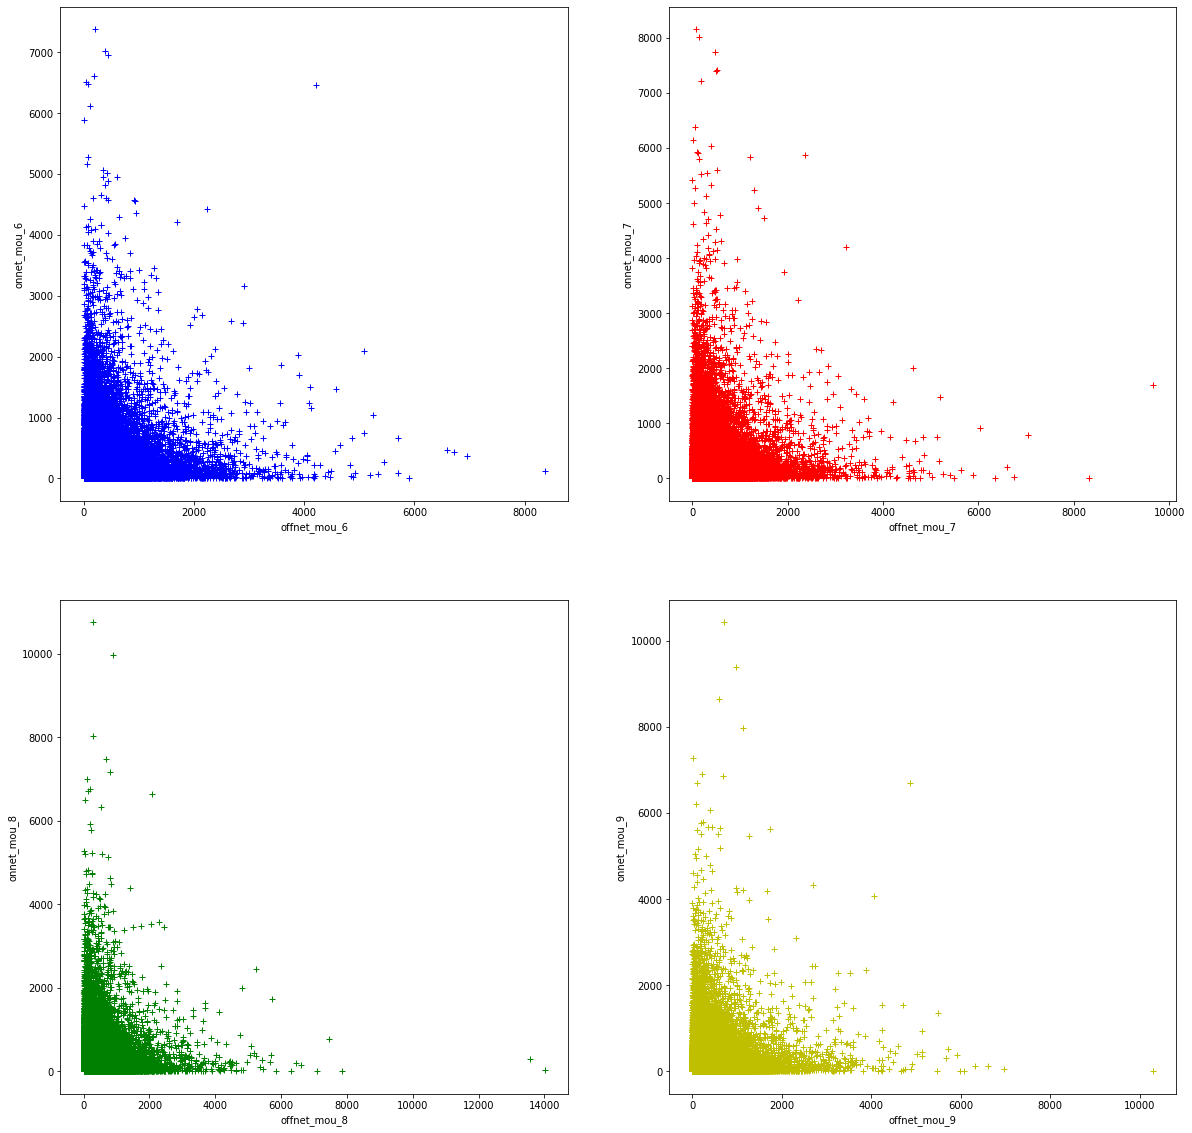

In [11]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['offnet_mou_6'],teleData['onnet_mou_6'],"b+")
ax1.set_xlabel("offnet_mou_6")
ax1.set_ylabel("onnet_mou_6")

ax2.plot(teleData['offnet_mou_7'],teleData['onnet_mou_7'],"r+")
ax2.set_xlabel("offnet_mou_7")
ax2.set_ylabel("onnet_mou_7")

ax3.plot(teleData['offnet_mou_8'],teleData['onnet_mou_8'],"g+")
ax3.set_xlabel("offnet_mou_8")
ax3.set_ylabel("onnet_mou_8")

ax4.plot(teleData['offnet_mou_9'],teleData['onnet_mou_9'],"y+")
ax4.set_xlabel("offnet_mou_9")
ax4.set_ylabel("onnet_mou_9")
plt.show()

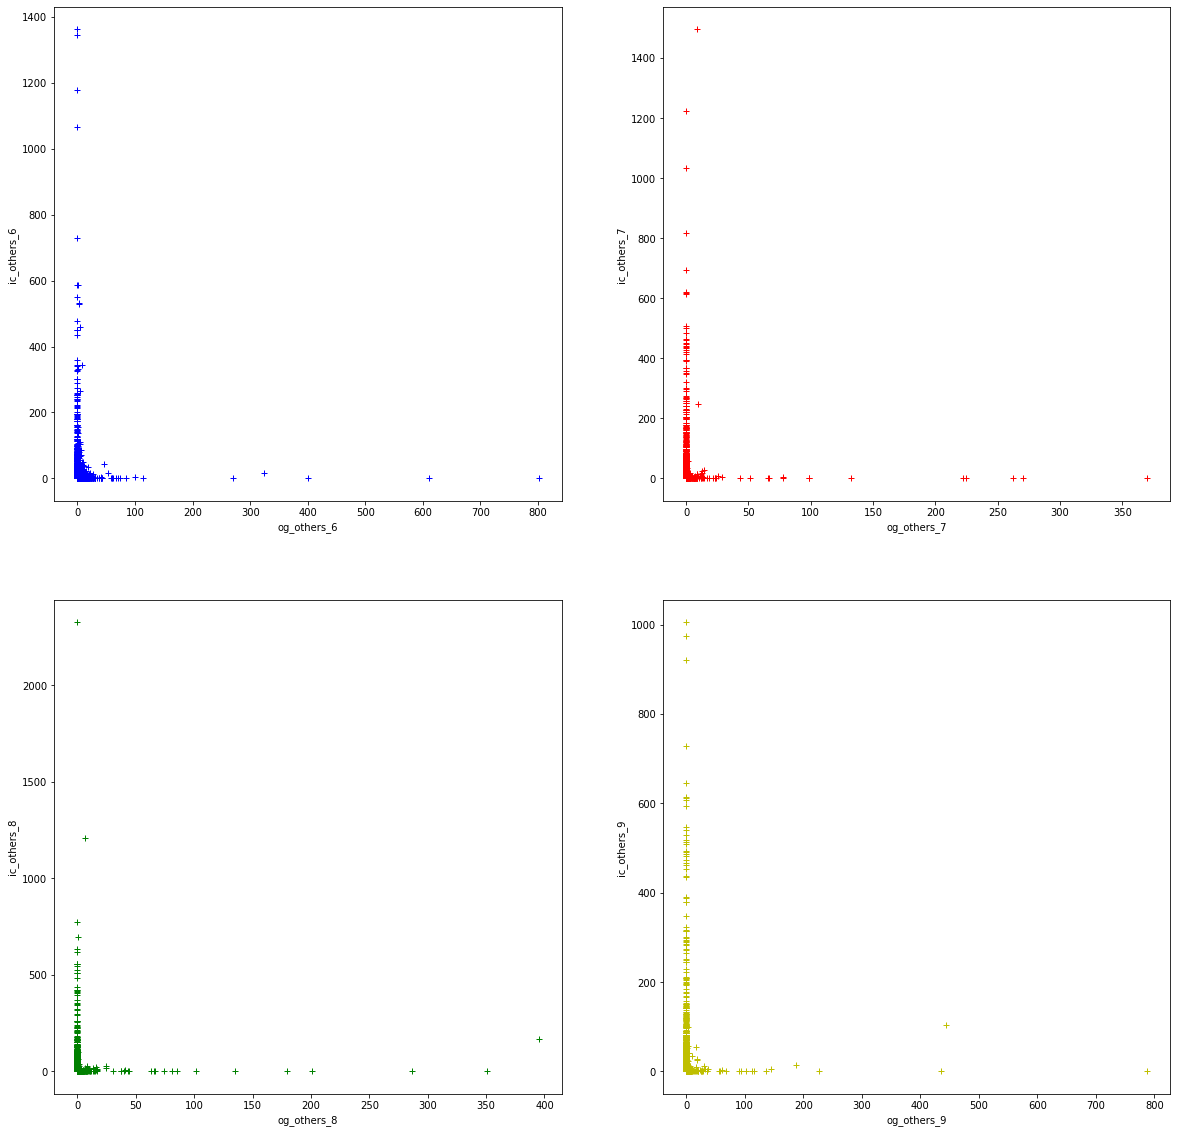

In [12]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['og_others_6'],teleData['ic_others_6'],"b+")
ax1.set_xlabel("og_others_6")
ax1.set_ylabel("ic_others_6")

ax2.plot(teleData['og_others_7'],teleData['ic_others_7'],"r+")
ax2.set_xlabel("og_others_7")
ax2.set_ylabel("ic_others_7")

ax3.plot(teleData['og_others_8'],teleData['ic_others_8'],"g+")
ax3.set_xlabel("og_others_8")
ax3.set_ylabel("ic_others_8")

ax4.plot(teleData['og_others_9'],teleData['ic_others_9'],"y+")
ax4.set_xlabel("og_others_9")
ax4.set_ylabel("ic_others_9")
plt.show()

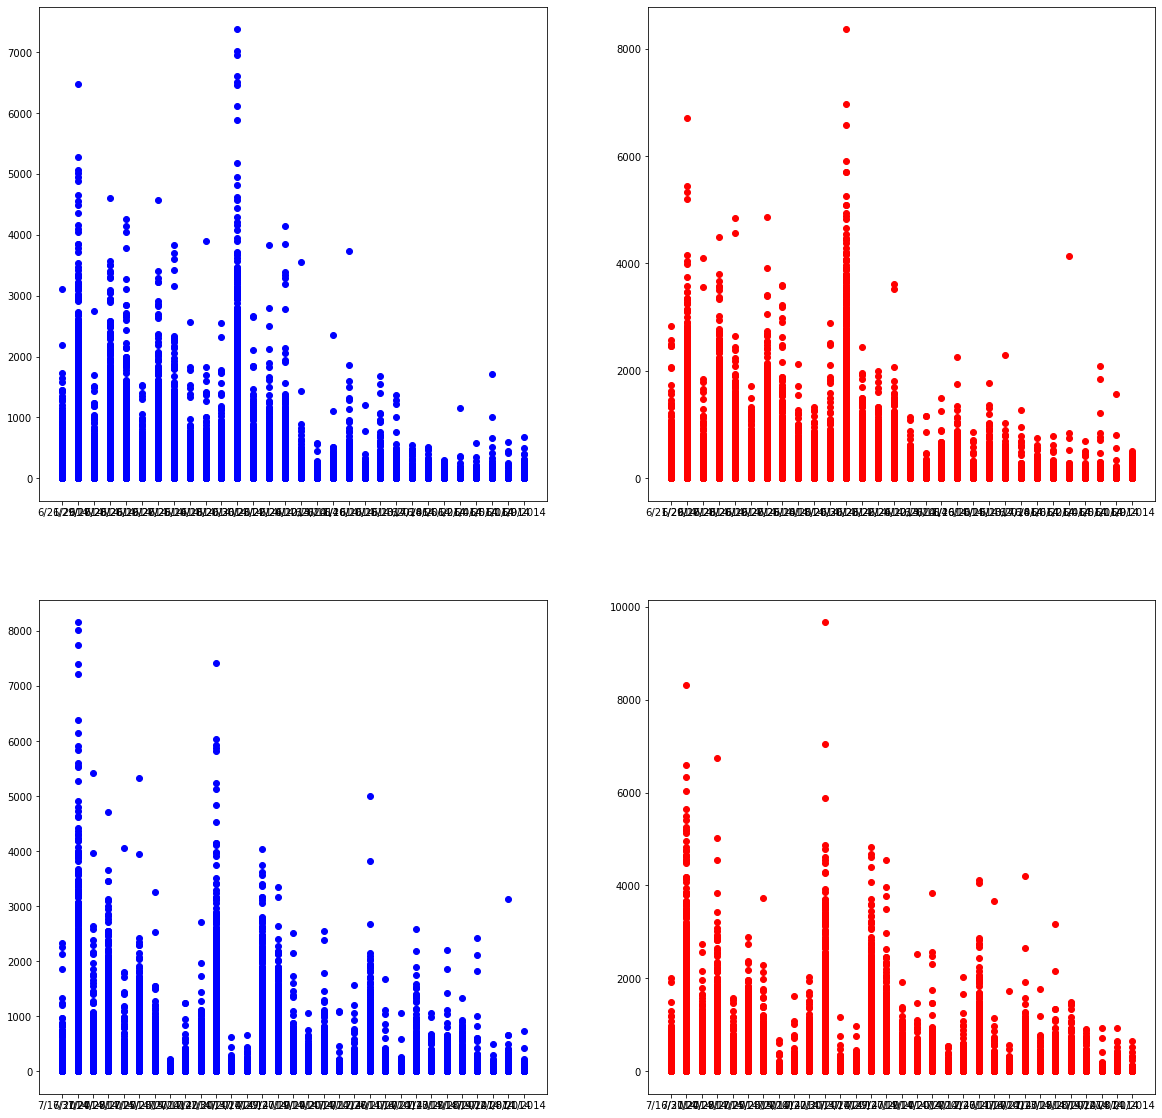

In [13]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['onnet_mou_6'],"bo")
ax2.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['offnet_mou_6'],"ro")


ax3.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['onnet_mou_7'],"bo")
ax4.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['offnet_mou_7'],"ro")

plt.show()

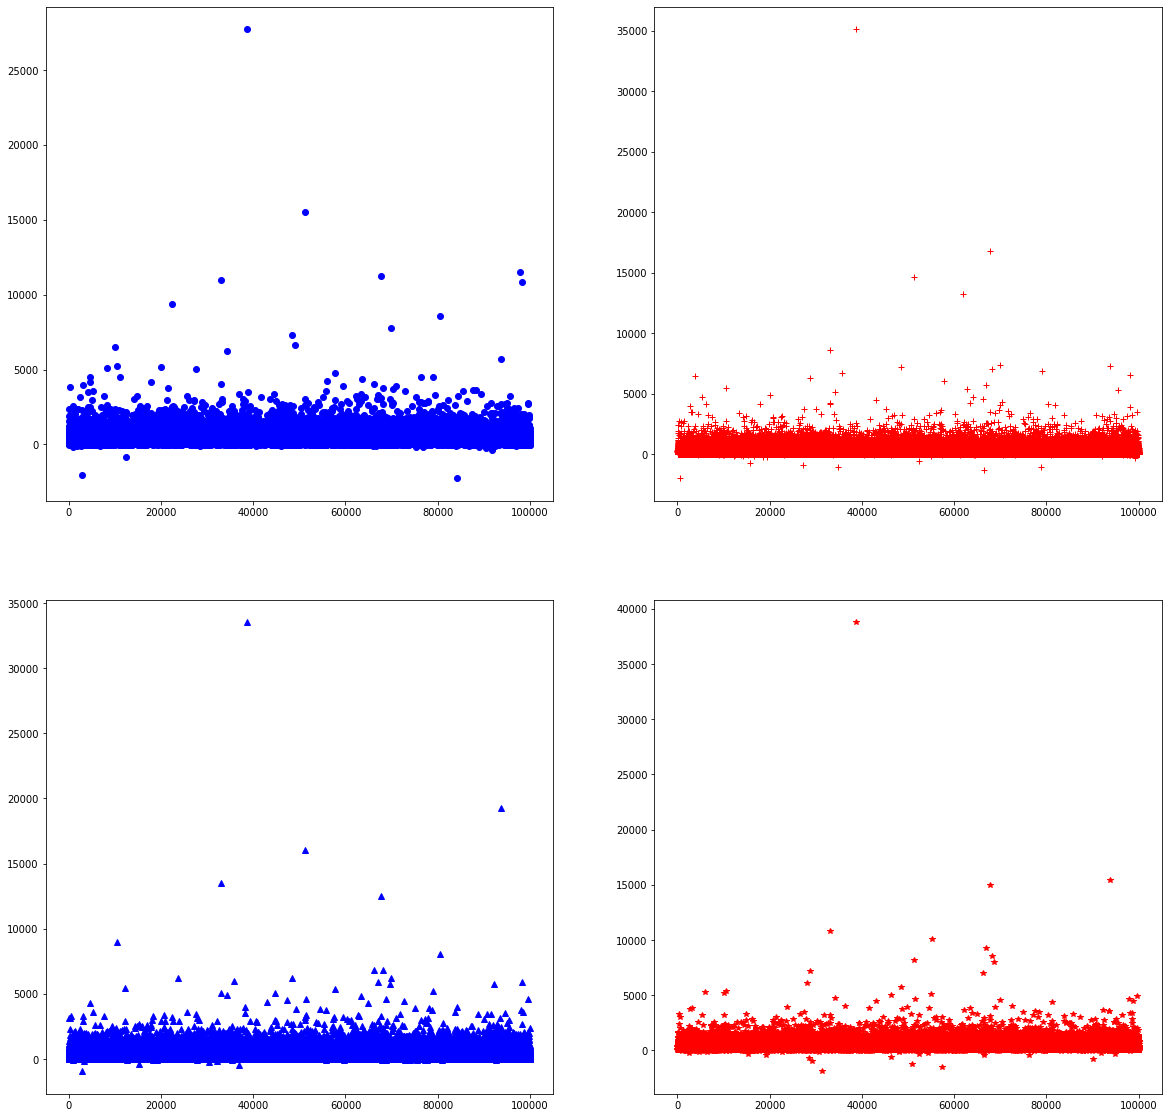

In [14]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_6'],"bo")
ax2.plot(teleData['arpu_7'],"r+")
ax3.plot(teleData['arpu_8'],"b^")
ax4.plot(teleData['arpu_9'],"r*")

plt.show()

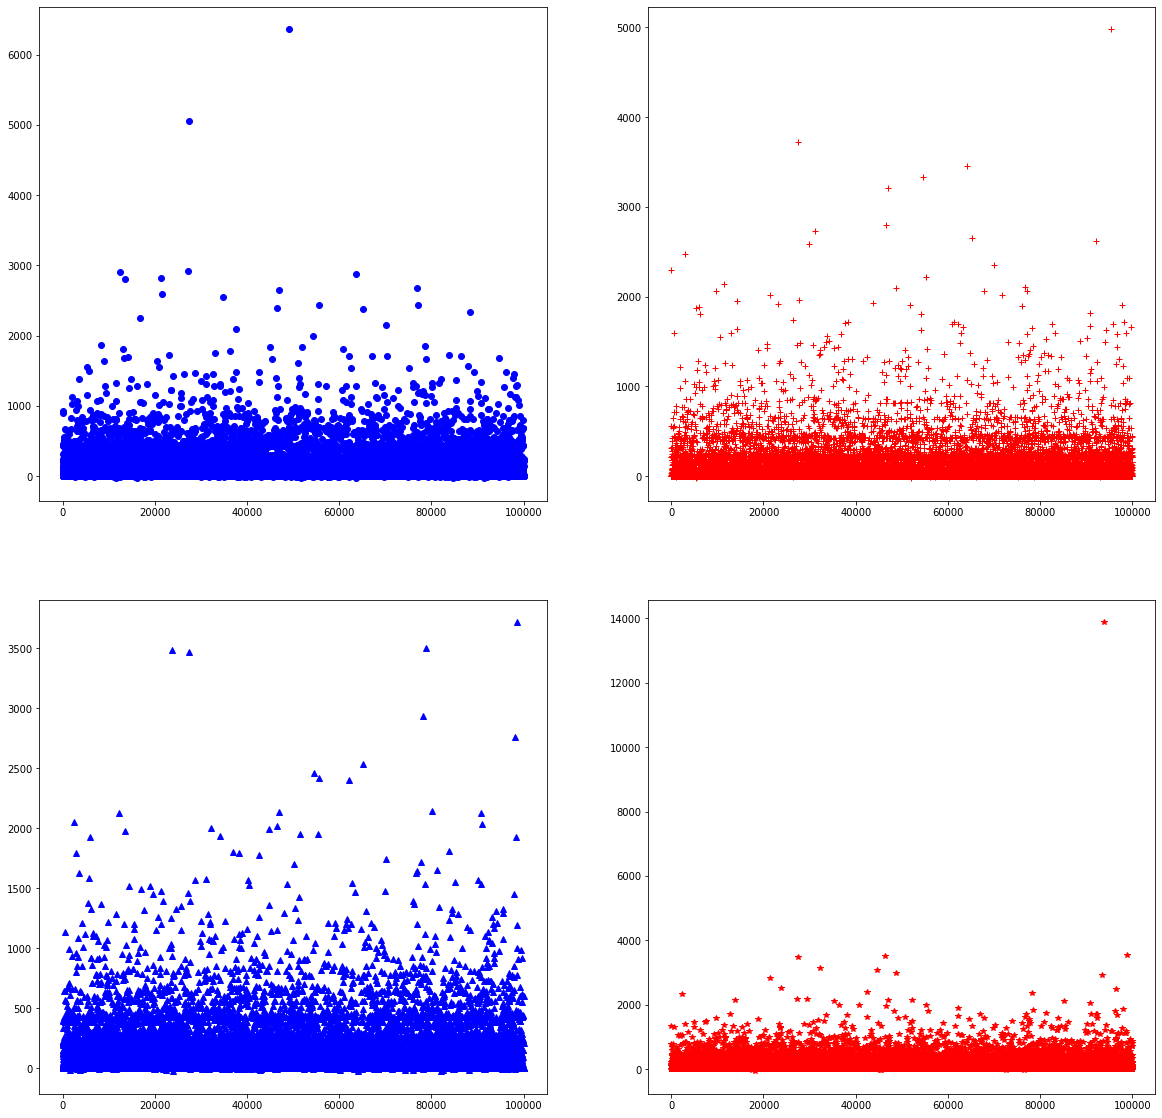

In [15]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_3g_6'],"bo")
ax2.plot(teleData['arpu_3g_7'],"r+")
ax3.plot(teleData['arpu_3g_8'],"b^")
ax4.plot(teleData['arpu_3g_9'],"r*")

plt.show()

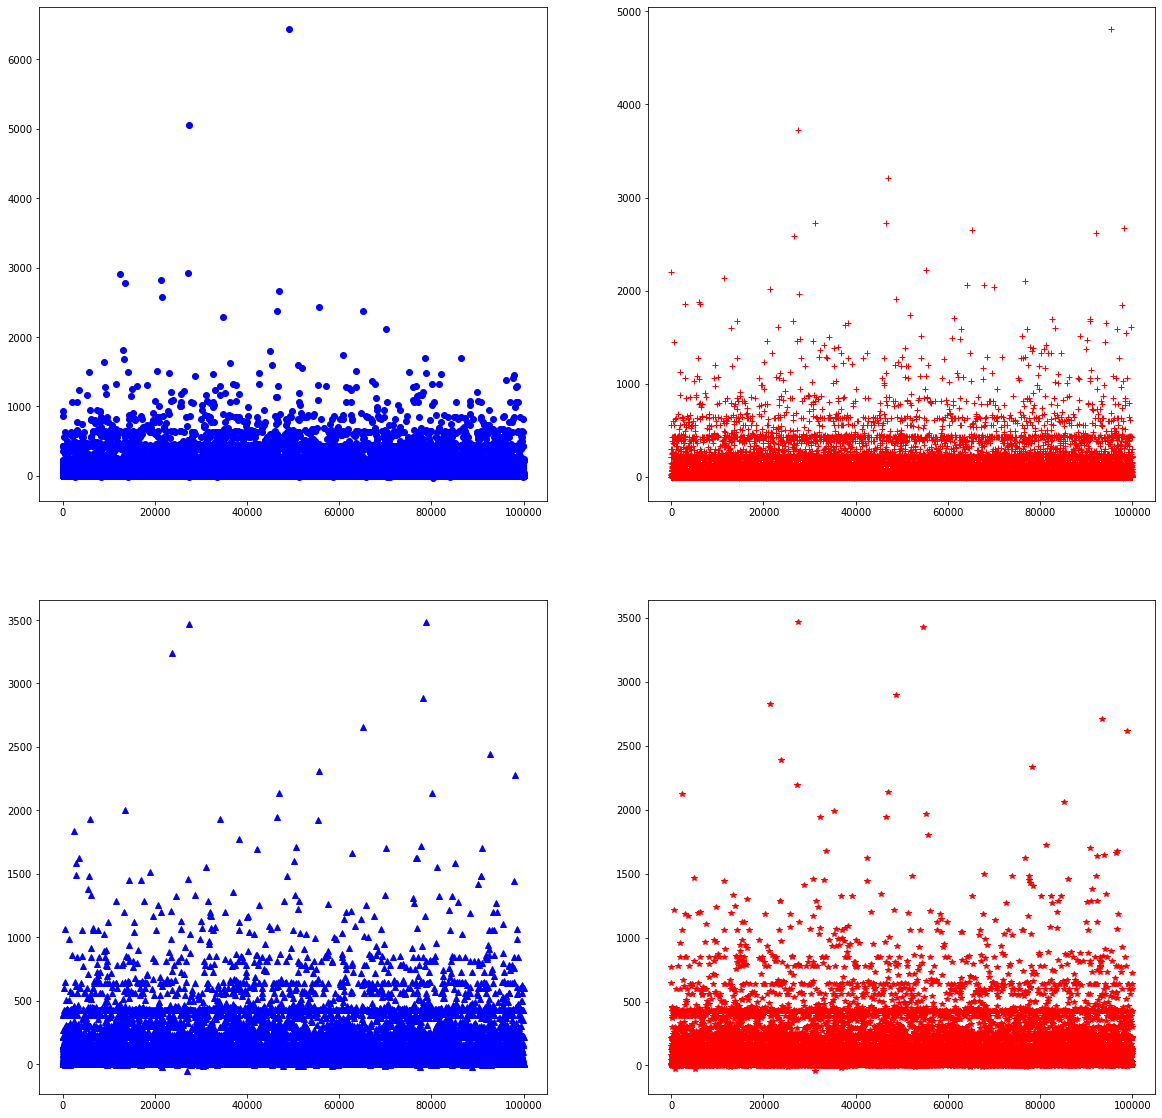

In [16]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_2g_6'],"bo")
ax2.plot(teleData['arpu_2g_7'],"r+")
ax3.plot(teleData['arpu_2g_8'],"b^")
ax4.plot(teleData['arpu_2g_9'],"r*")

plt.show()

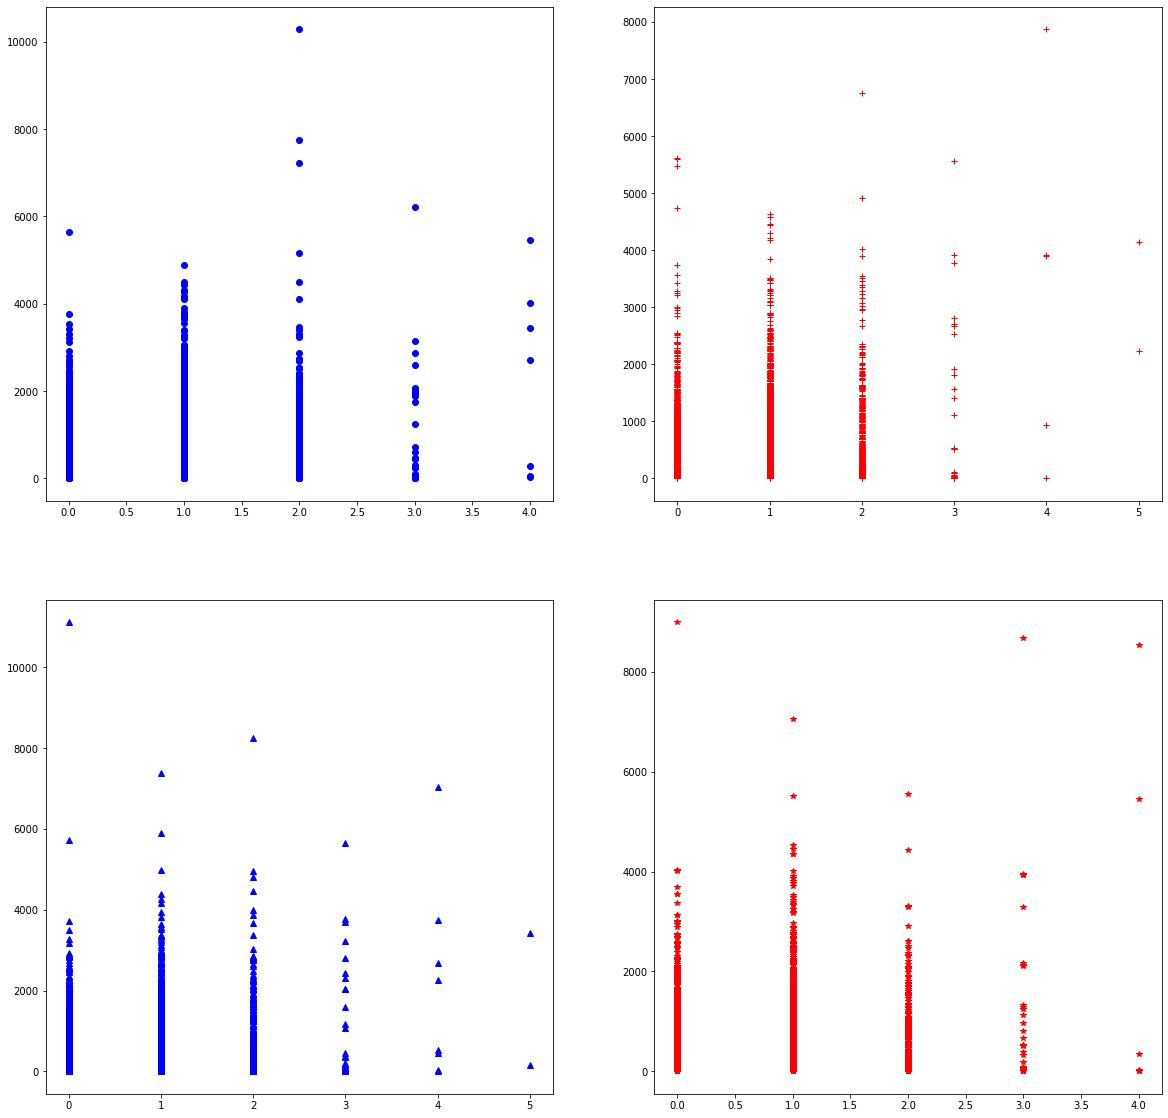

In [17]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_2g_6'],teleData['vol_2g_mb_6'],"bo")
ax2.plot(teleData['monthly_2g_7'],teleData['vol_2g_mb_7'],"r+")
ax3.plot(teleData['monthly_2g_8'],teleData['vol_2g_mb_8'],"b^")
ax4.plot(teleData['monthly_2g_9'],teleData['vol_2g_mb_9'],"r*")

plt.show()

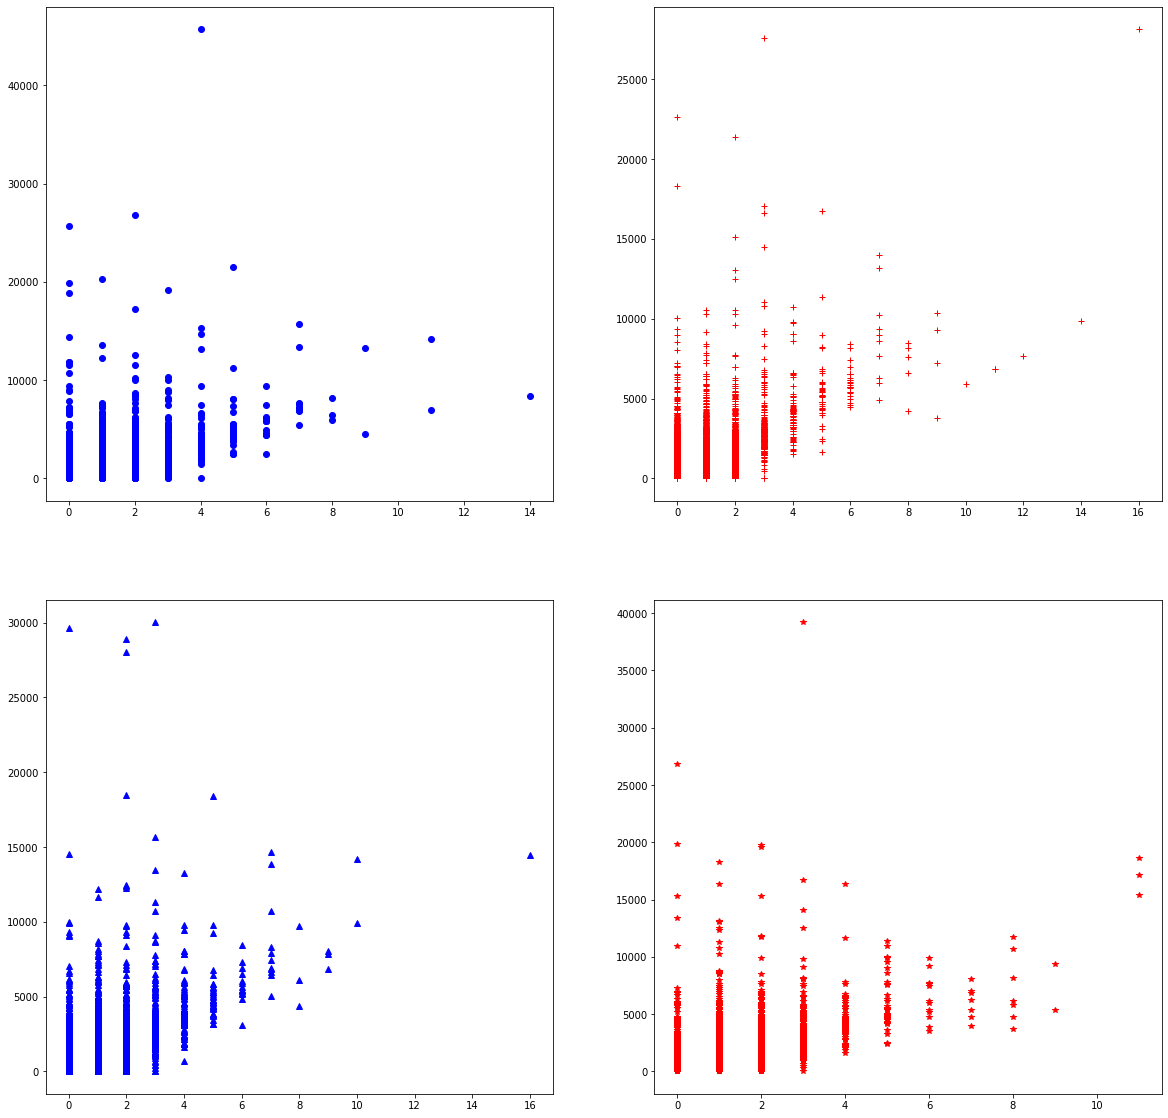

In [18]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_3g_6'],teleData['vol_3g_mb_6'],"bo")
ax2.plot(teleData['monthly_3g_7'],teleData['vol_3g_mb_7'],"r+")
ax3.plot(teleData['monthly_3g_8'],teleData['vol_3g_mb_8'],"b^")
ax4.plot(teleData['monthly_3g_9'],teleData['vol_3g_mb_9'],"r*")

plt.show()

# Data Preparation

## Missing Value Check

#### Checking for the categorical variables with only 2 unique values.

In [19]:
# Creating a copy of the original dataset, where we will be imputing the Null values.
teleData_imputed=teleData

In [20]:
# Columns with only 2 unique value.
nunique_2=pd.DataFrame(teleData.nunique().where(lambda x:x==2).dropna())
teleData[nunique_2.index].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
0               0.0               0.0               0.0               NaN   
1               NaN               0.0               0.0               NaN   
2               NaN               NaN               NaN               0.0   
3               NaN               NaN               NaN               NaN   
4               0.0               NaN               NaN               NaN   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0        1.0        1.0        1.0        NaN  
1        NaN        1.0        1.0        NaN  
2        NaN        NaN        NaN        1.0  
3        NaN        NaN        NaN        NaN  
4        0.0        NaN        NaN        NaN

#### Observation:

The columns `fb_users_*` and `night_pck_user_*` have only 2 unique values i.e. only 0 & 1. The Null values means that the users are not 
Looking at the above data, we can safely impute 0 for all the missing values for 'fb_users_*' and 'night_pck_user_*'.

In [21]:
# Replacing the Null values with 0.
teleData_imputed[nunique_2.index]=teleData[nunique_2.index].fillna(0)

#### Checking for the columns with more than 10% null values.

In [22]:
#Columns with more than 10% null values.
null_series=round(100*(teleData.isnull().sum(axis=0)/len(teleData)),2).where(lambda x:x!=0).dropna()
null_greater_10_perc=null_series.sort_values(ascending=False).where(lambda x: x>10).dropna()
null_greater_10_perc

total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
arpu_3g_6                   74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
max_rech_data_7             74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
arpu_2g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_8             73.66
max_rech_data_8             73.66
arpu_3g_8                   73.66
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
total_rech_dat

#### Observation:
Here for the columns with more than 10% of missing data, we can see that the percentage of Null for all the columns for a particular month are same. Also we can see that the missing values are all related to `2g/3g Data`. 

So, we can imply that if a user does not recharge for a data pack, then that user's data usage is also expected to be Null.

Therefore, here we can safely impute 0 for all the above Null values.

In [23]:
teleData_imputed[null_greater_10_perc.index]=teleData[null_greater_10_perc.index].fillna(0)

#### Dropping "date_of_last_rech_data_" related columns

We can see that if the user does not recharge for the month, the "date_of_last_rech_data_*" becomes Null. 

We cannot implute any date value to this field, as it wouldn't make any sense.

So, we can remove these columns.

In [24]:
# Dropping the `date_of_last_rech_data_*` column
teleData_imputed.drop(['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9'],axis=1,inplace=True)

#### Checking for the columns with less than 10% null values.

In [25]:
#Columns with less than 10% null values.
null_series=round(100*(teleData.isnull().sum(axis=0)/len(teleData)),2).where(lambda x:x!=0).dropna()
null_less_10_perc=null_series.sort_values(ascending=False).where(lambda x: x<=10).dropna()

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (null_less_10_perc)

loc_og_t2m_mou_9        7.75
roam_ic_mou_9           7.75
loc_og_t2f_mou_9        7.75
loc_ic_t2m_mou_9        7.75
loc_ic_mou_9            7.75
std_og_t2f_mou_9        7.75
loc_og_t2c_mou_9        7.75
std_ic_t2t_mou_9        7.75
loc_ic_t2t_mou_9        7.75
loc_og_t2t_mou_9        7.75
std_ic_t2m_mou_9        7.75
og_others_9             7.75
std_ic_t2f_mou_9        7.75
roam_og_mou_9           7.75
loc_og_mou_9            7.75
spl_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
loc_ic_t2f_mou_9        7.75
onnet_mou_9             7.75
std_og_t2c_mou_9        7.75
std_og_t2t_mou_9        7.75
isd_og_mou_9            7.75
spl_ic_mou_9            7.75
ic_others_9             7.75
offnet_mou_9            7.75
std_og_t2m_mou_9        7.75
std_ic_mou_9            7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2c_mou_8        5.38
loc_ic_t2m_mou_8        5.38
loc_og_t2c_mou_8        5.38
std_og_t2t_mou_8        5.38
std_og_mou_8            5.38
std_og_t2m_mou

In [27]:
# As we are all dealing with usage based data, a Null value means "No Usage". So can impute 0 for all the Null values.
# Imputing the Null values with '0' of the column for those columns with less than 10% Null values.
teleData_imputed[null_less_10_perc.index]=teleData[null_less_10_perc.index].fillna(0)

In [28]:
# Removing the columns with `date` values.
cols_Date=[col for col in teleData_imputed if "date" in col]
cols_Date

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [29]:
# Dropping the `_date_` columns
teleData_imputed.drop(cols_Date,axis=1,inplace=True)

In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_imputed.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     189.441086    186.002904    175.595457       9.558277       6.873981   
std      321.759659    321.325854    310.968398      71.403643      72.029965   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.650000     23.840000     16.030000       0.000000       0.000000   
50%       85.440000     83.130000     74.680000       0.000000       0.000000   
75%      217.830000    215.500000    202.830000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.246387         44.679599   
std        62.989180      56.176090        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.990000          1.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.000000         38.820000         37.890000   
max      

In [31]:
# Checking if any columns has Null values.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (teleData_imputed.isnull().mean())
display(teleData_imputed.describe())
null_series=round(100*(teleData_imputed.isnull().sum(axis=0)/len(teleData_imputed)),2).where(lambda x:x!=0).dropna()
null_series

#No columns are having Null values

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  99999.000000  ...  99999.000000  99999.000000  99999.000000   
mean     127.183397  ...      0.084581      0.230002      0.232382   
std      292.433718  ...      0.650457      0.420836      0.422354   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        5.430000  ...      0.000000      0.000000      0.000000   
50%       30.980000  ...      0.000000      0.000000      0.000000   
75%      112.610000  ...      0.000000      0.000000      0.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.234632      0.223182   1219.854749     68.170248     66.839062   
std        0.423771      0.416382    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    467.000000      0.000000      0.000000   
50%        0.000000      0.000000    863.000000      0.000000      0.000000   
75%        0.000000      0.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

Series([], dtype: float64)

In [32]:
teleData_imputed.shape

(99999, 214)

## Outlier Detection

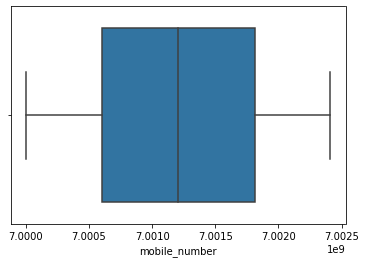

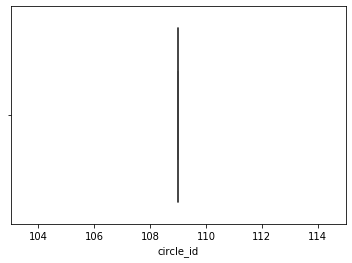

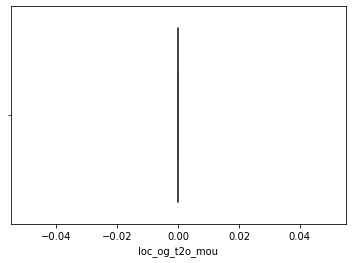

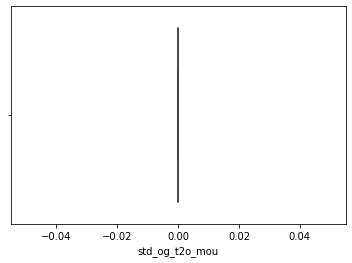

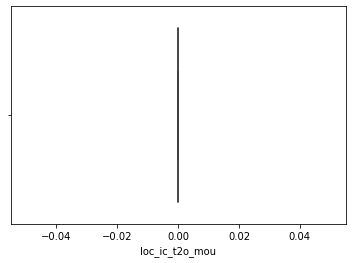

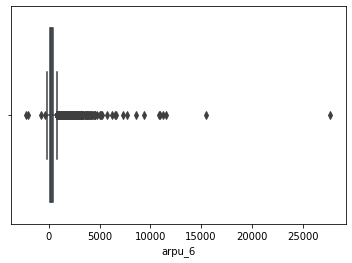

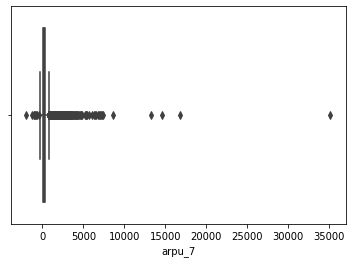

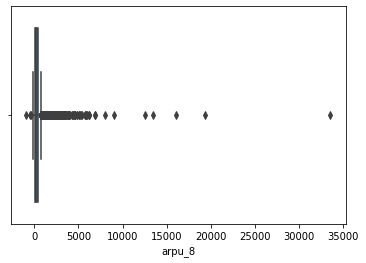

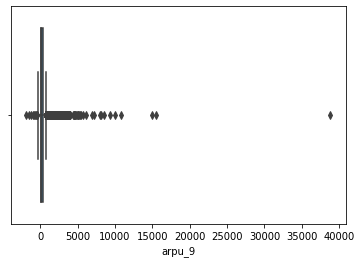

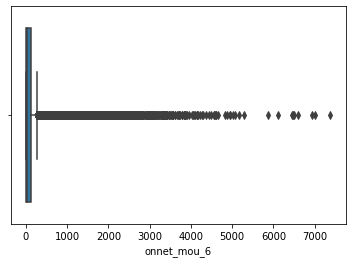

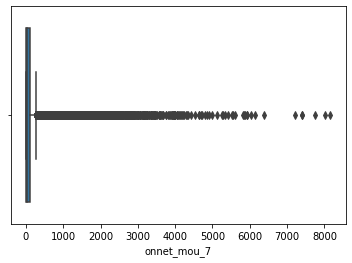

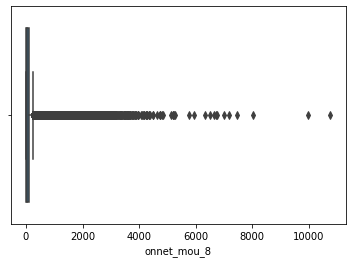

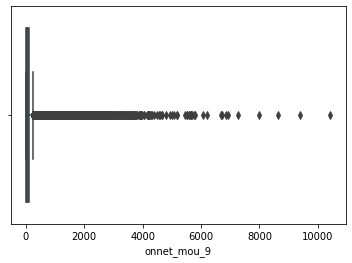

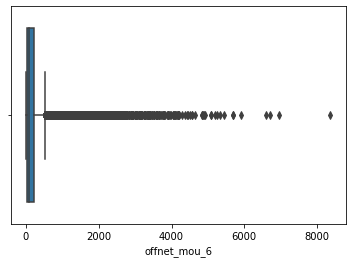

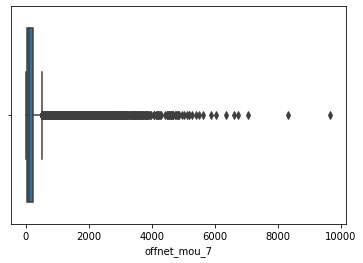

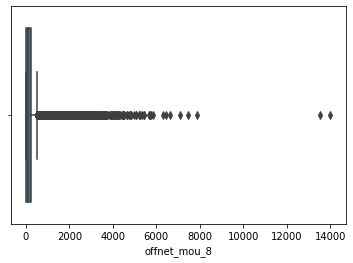

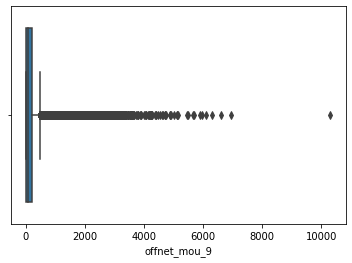

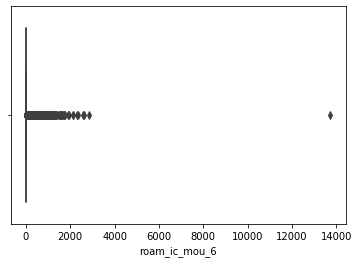

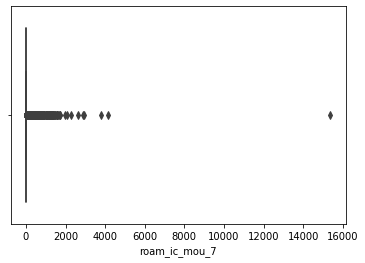

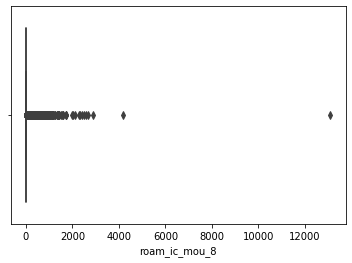

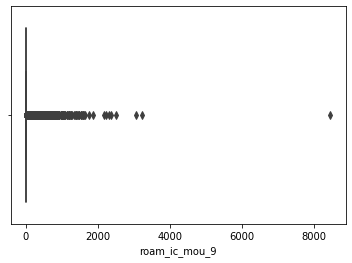

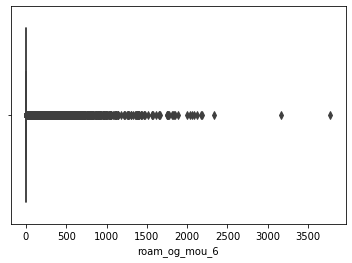

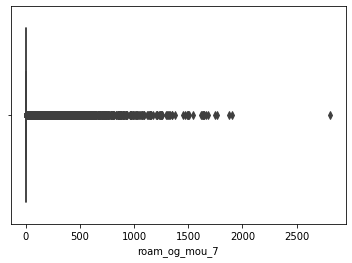

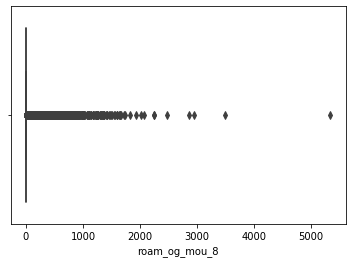

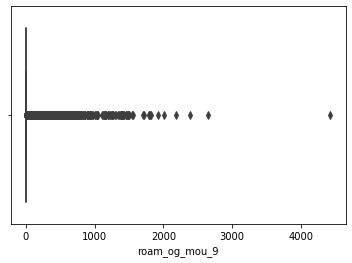

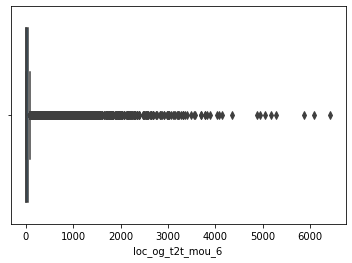

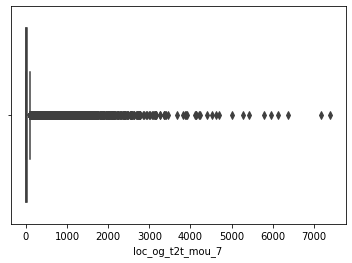

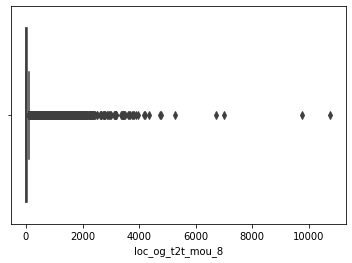

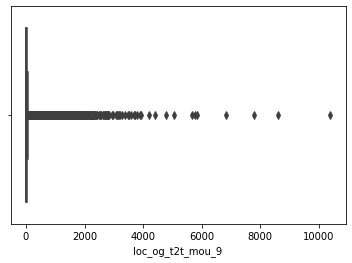

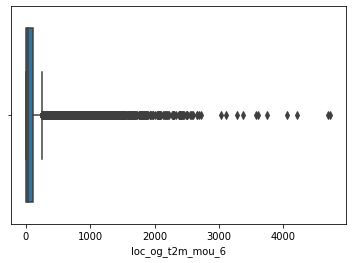

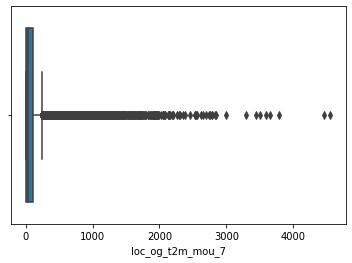

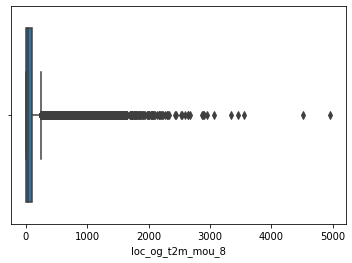

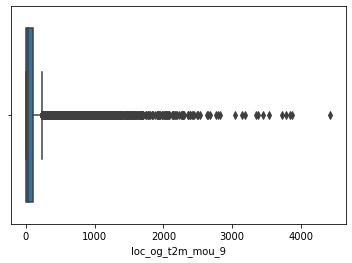

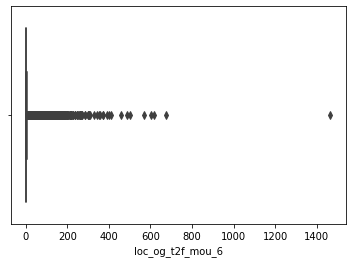

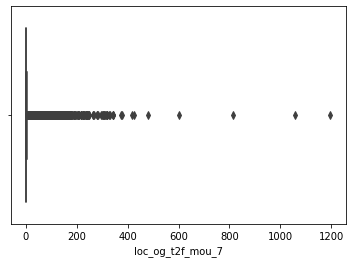

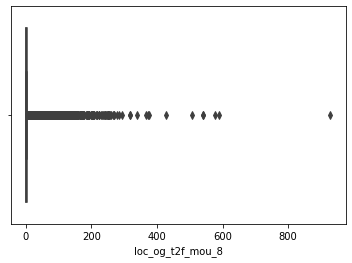

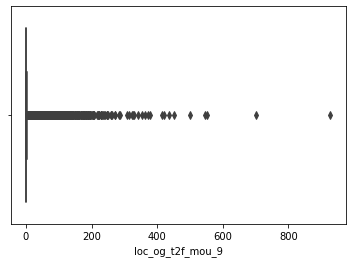

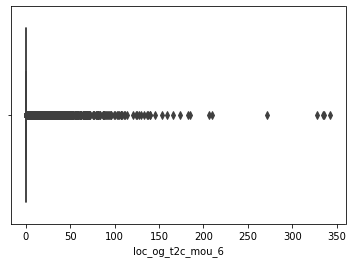

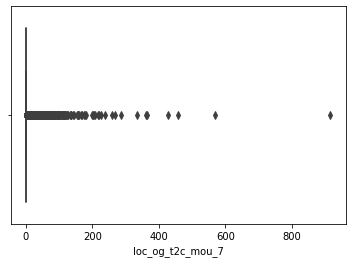

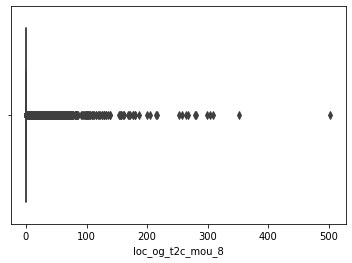

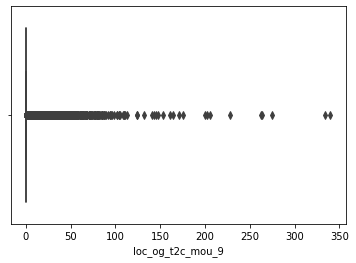

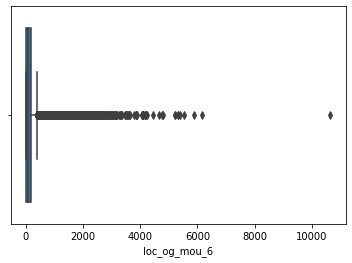

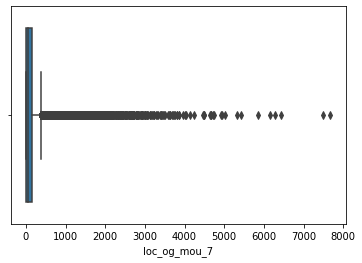

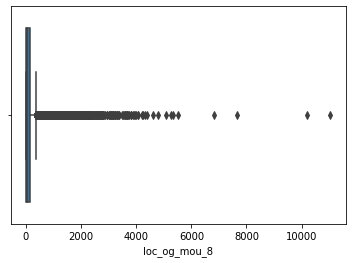

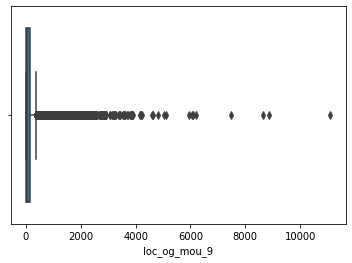

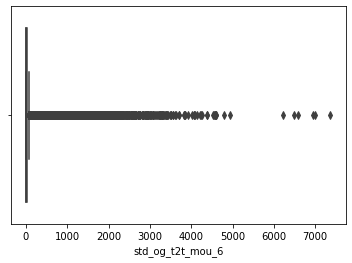

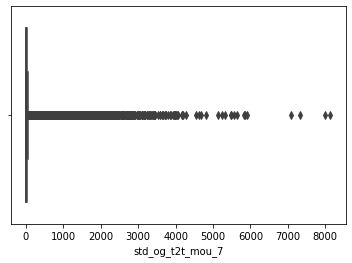

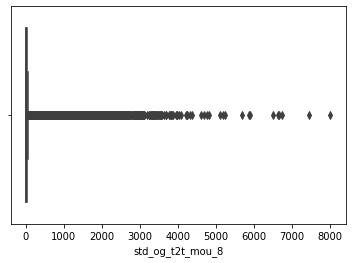

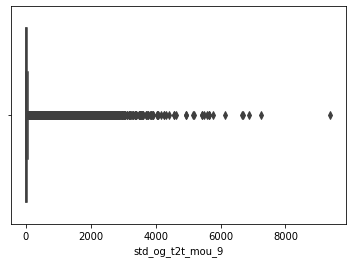

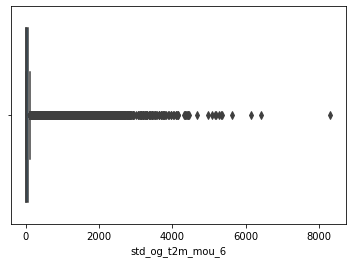

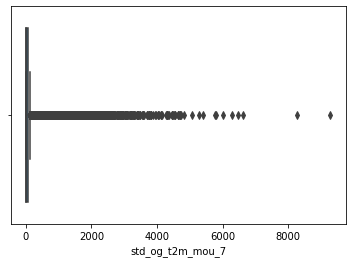

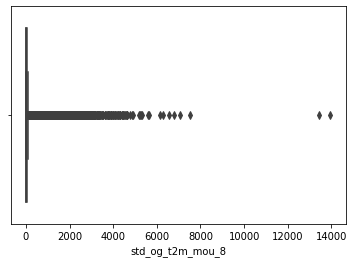

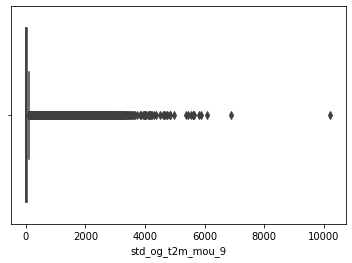

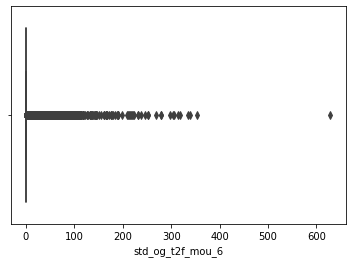

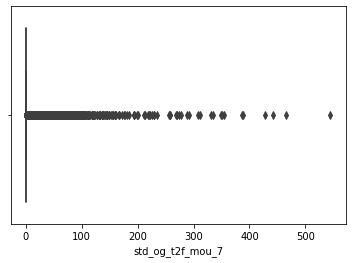

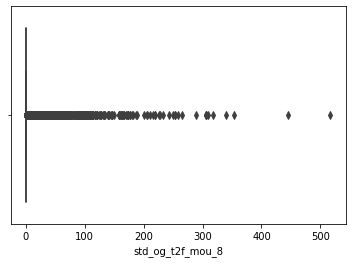

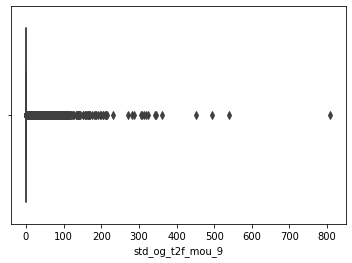

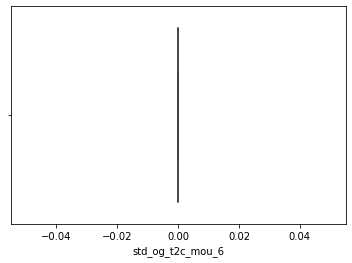

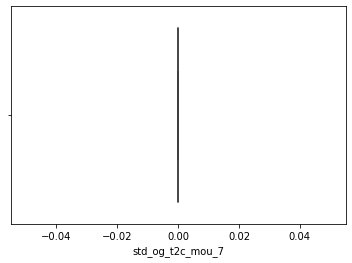

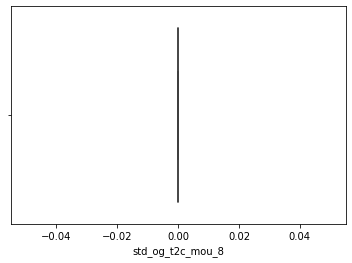

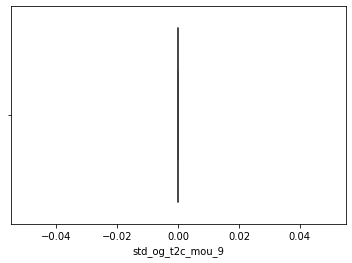

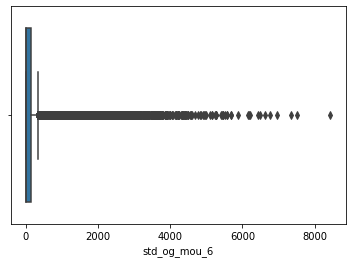

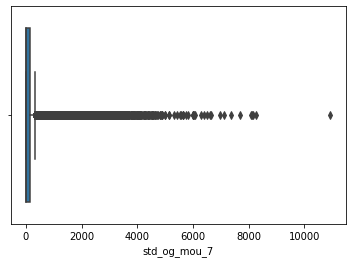

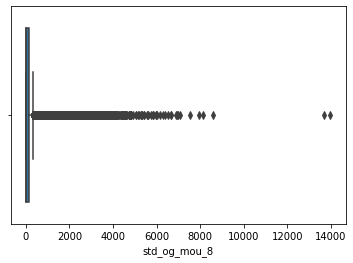

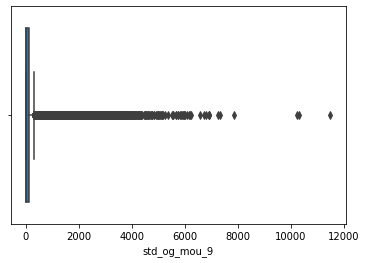

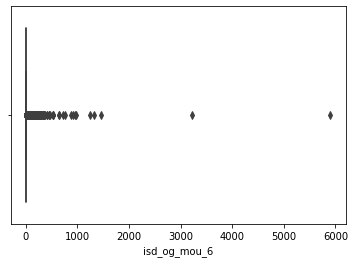

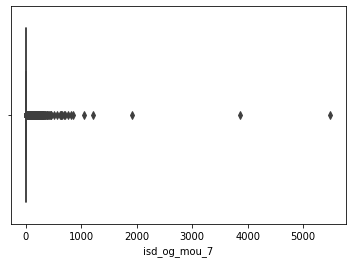

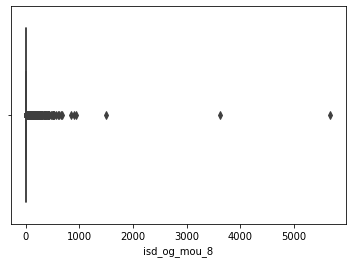

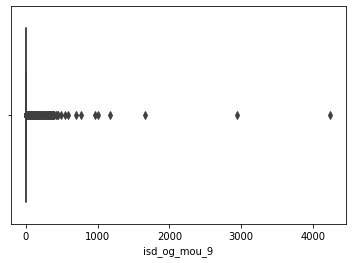

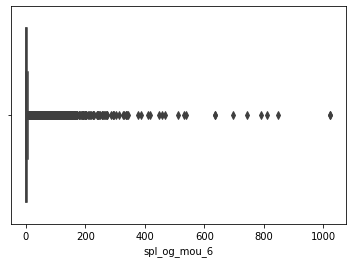

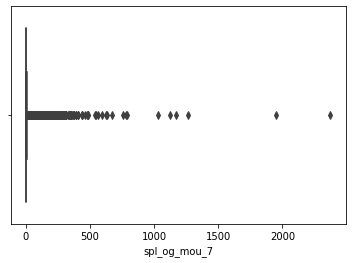

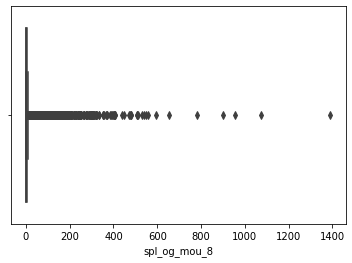

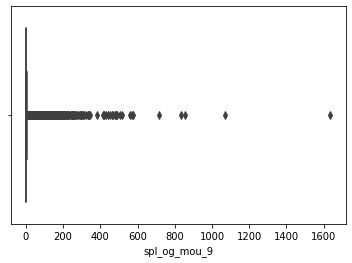

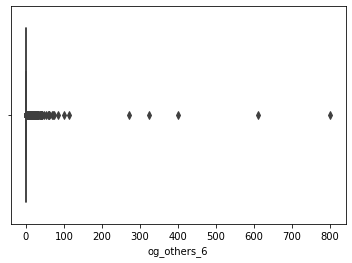

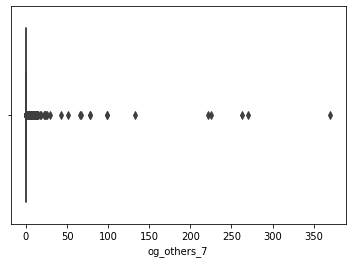

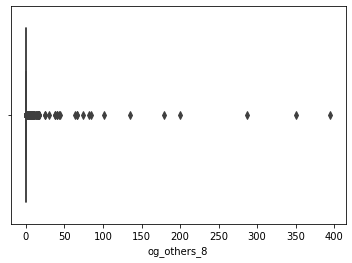

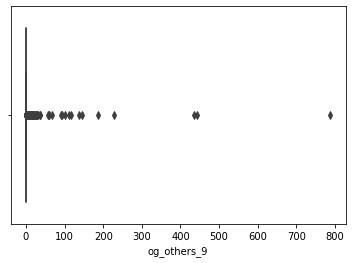

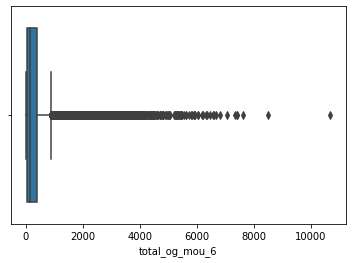

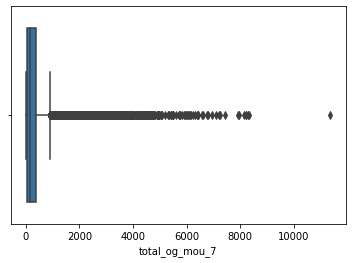

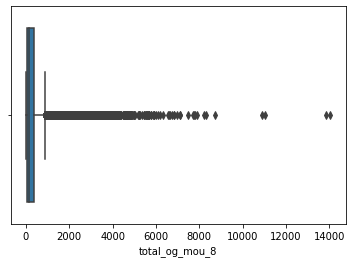

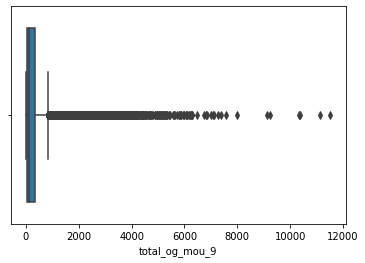

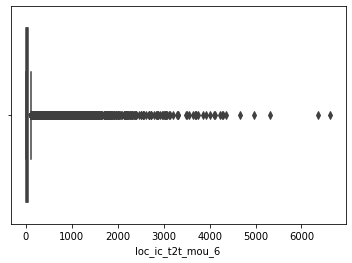

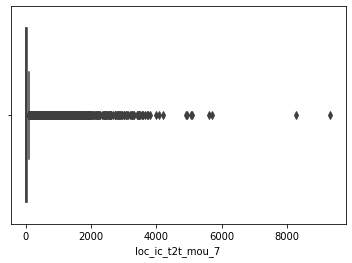

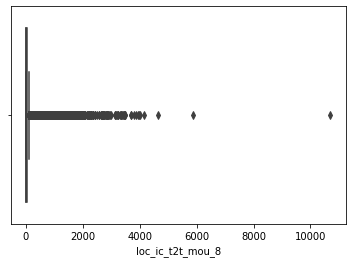

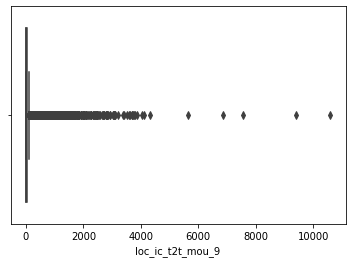

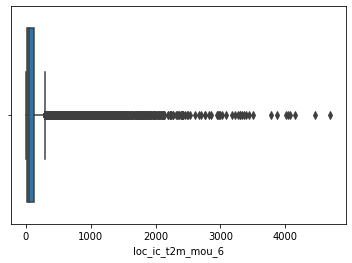

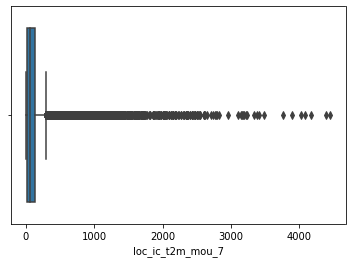

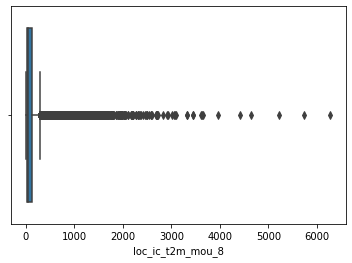

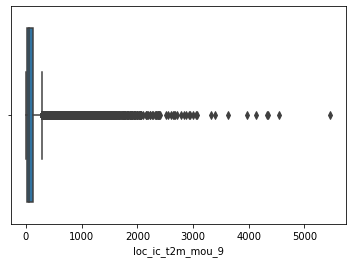

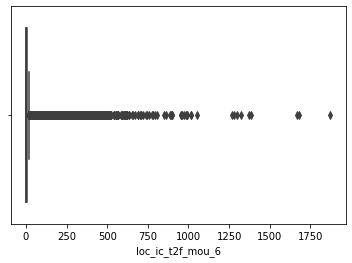

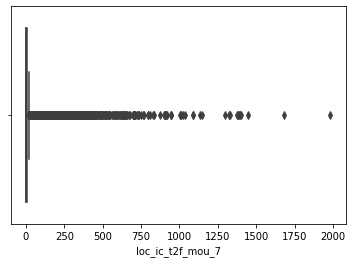

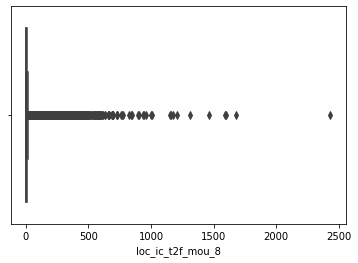

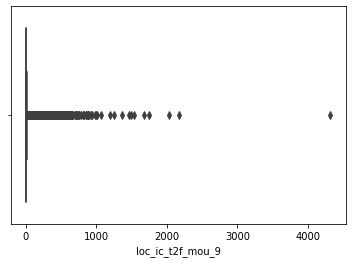

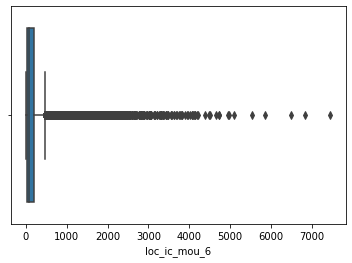

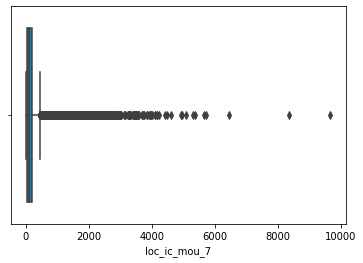

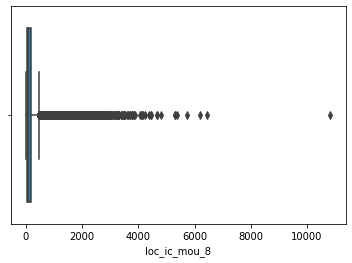

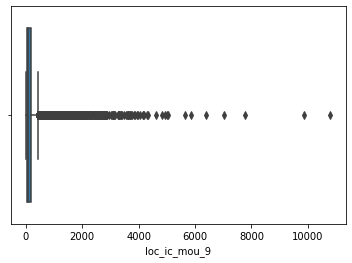

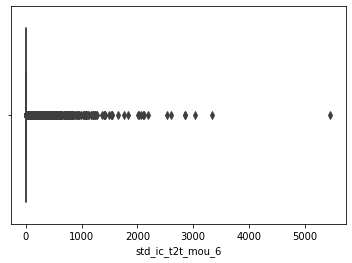

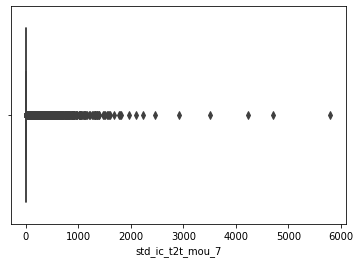

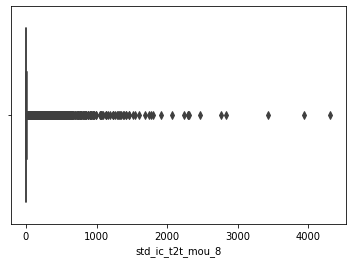

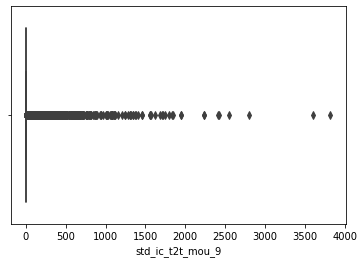

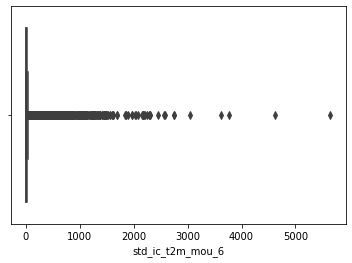

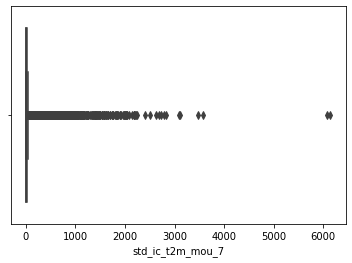

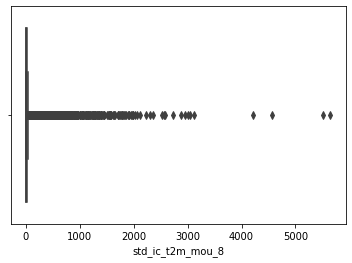

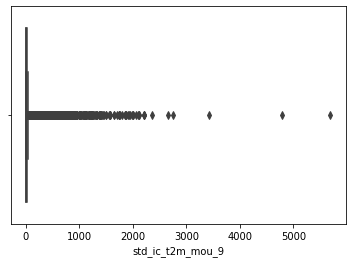

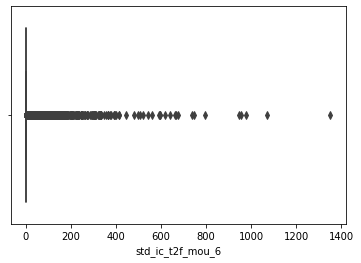

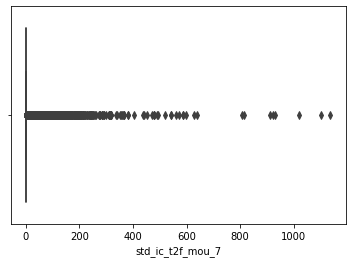

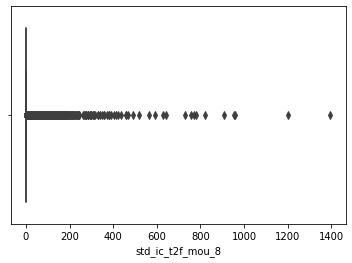

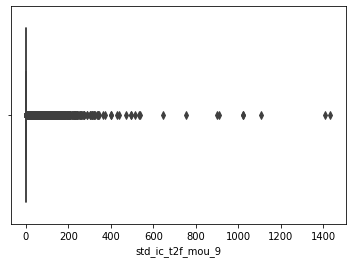

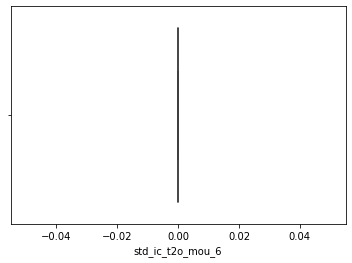

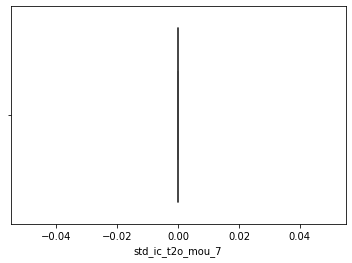

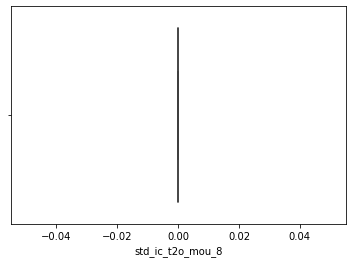

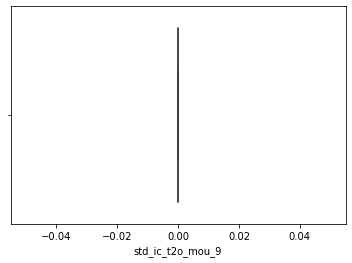

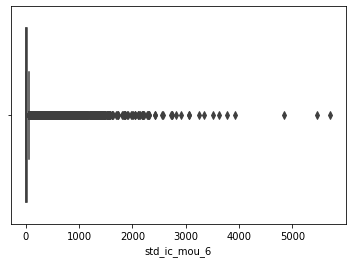

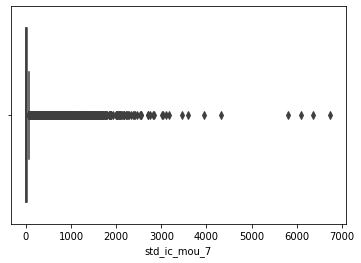

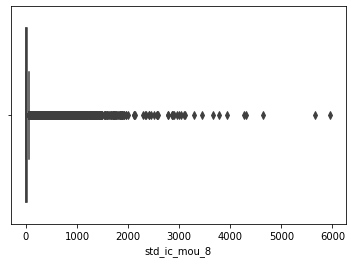

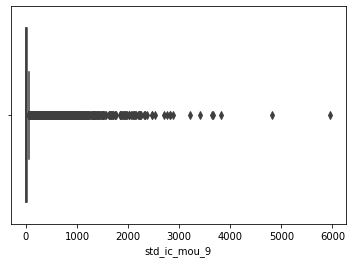

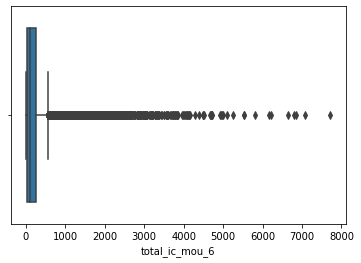

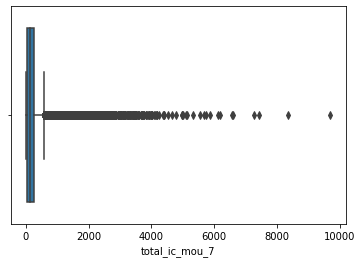

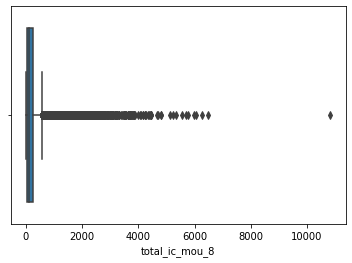

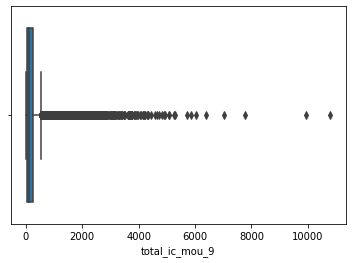

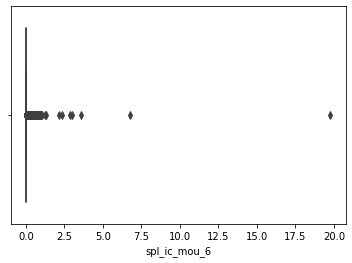

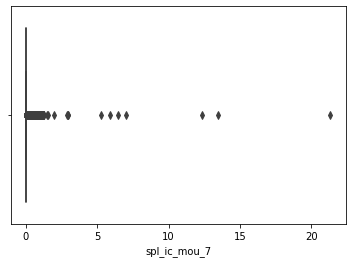

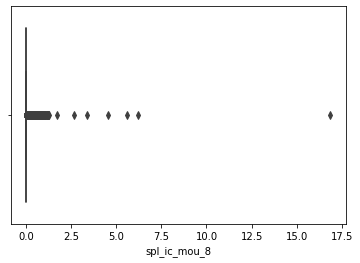

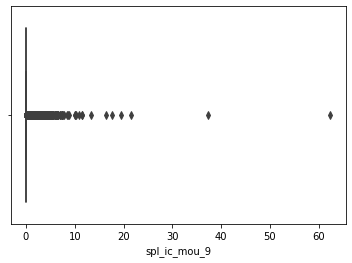

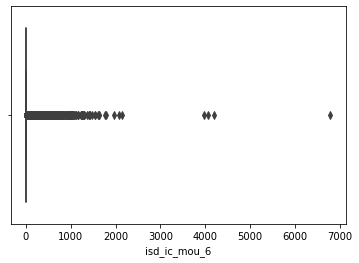

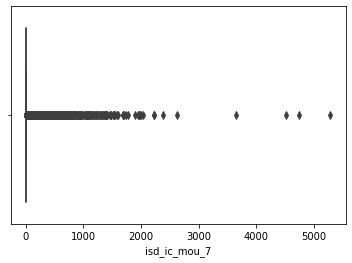

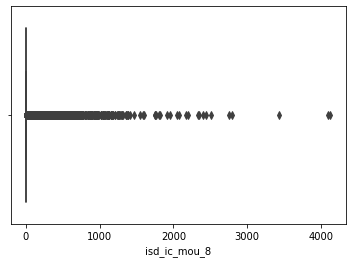

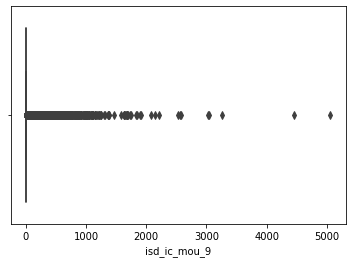

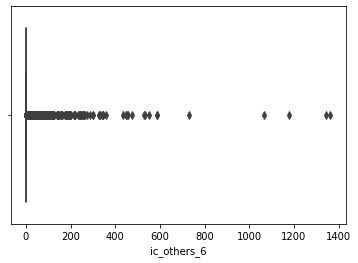

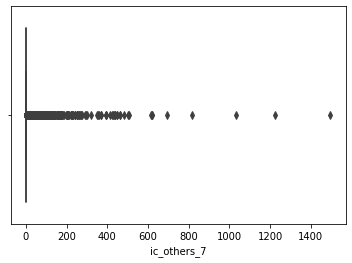

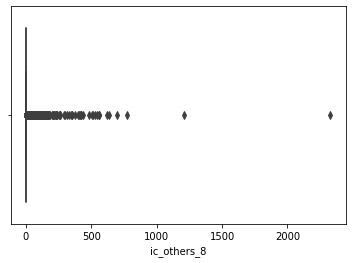

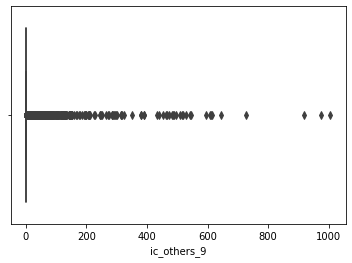

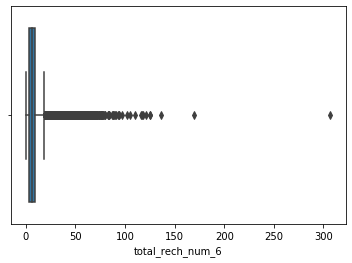

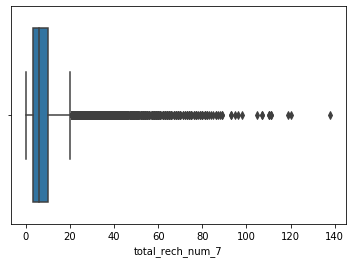

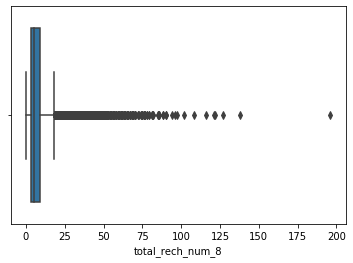

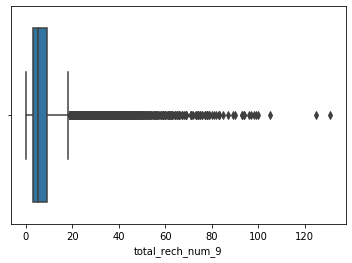

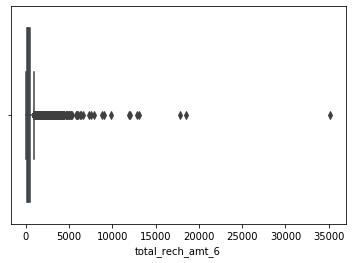

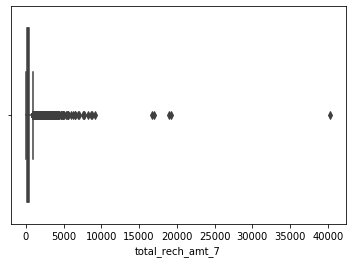

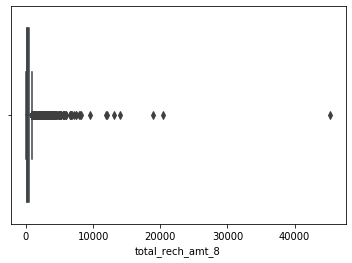

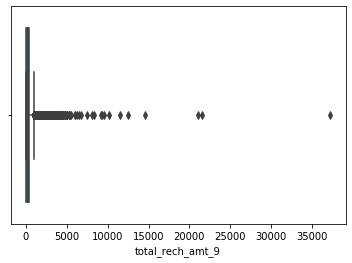

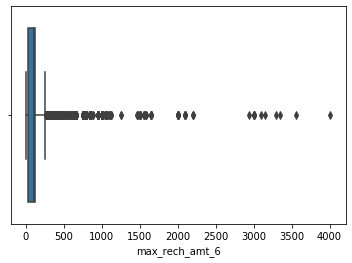

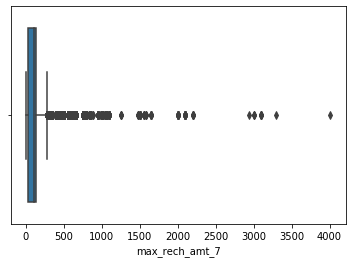

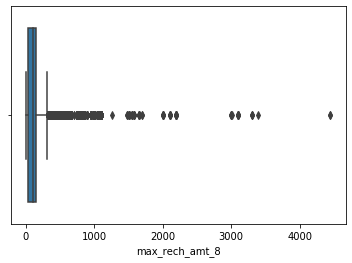

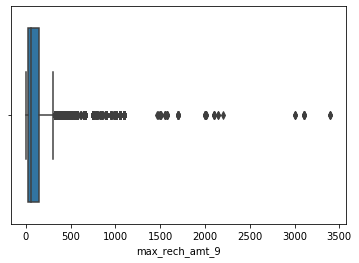

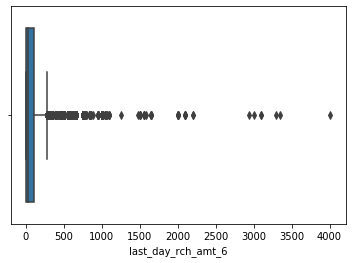

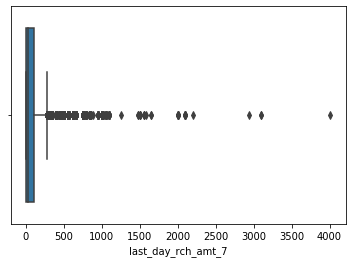

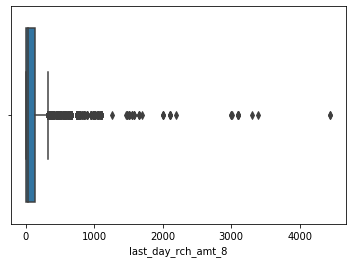

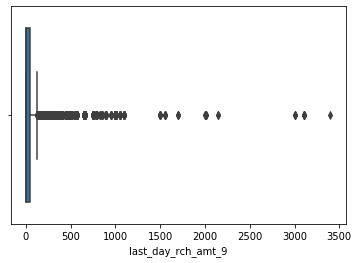

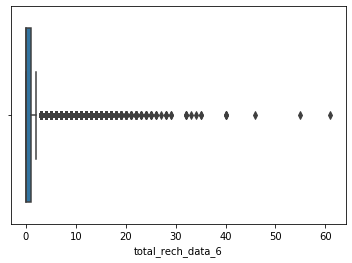

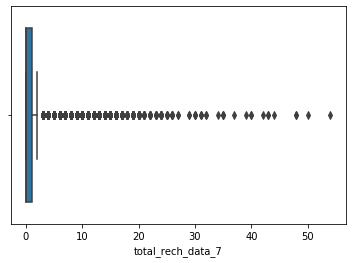

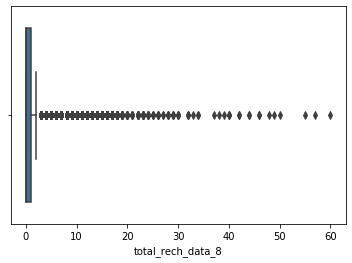

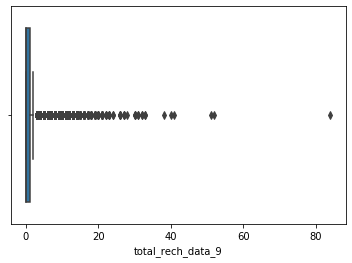

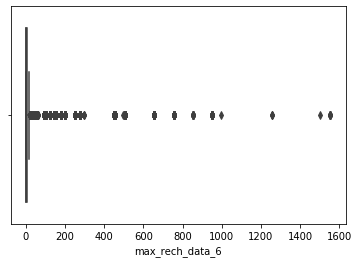

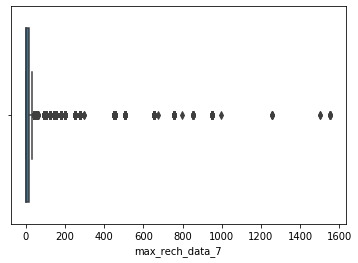

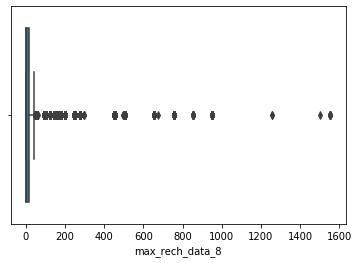

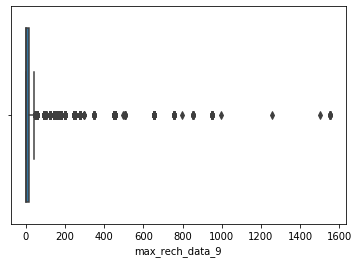

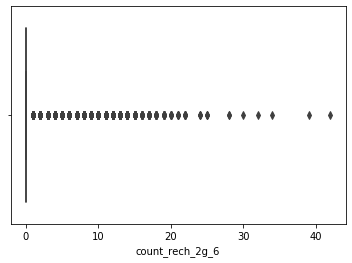

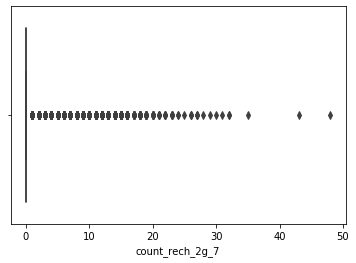

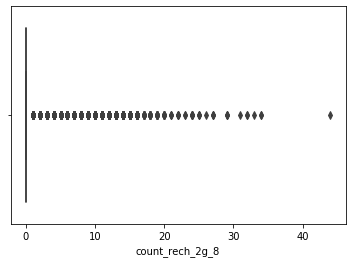

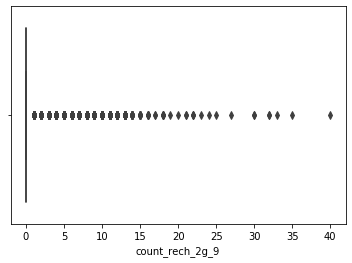

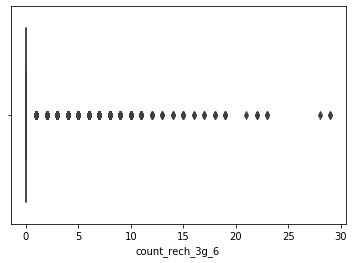

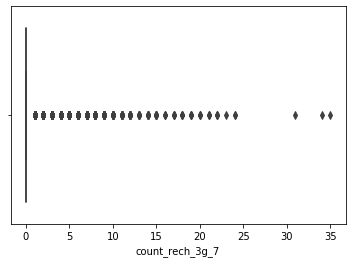

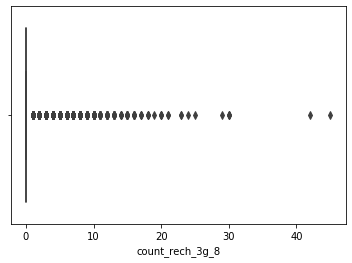

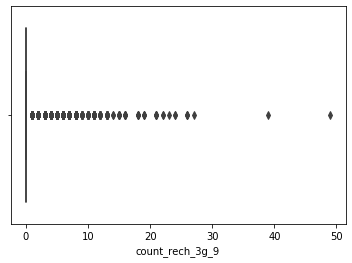

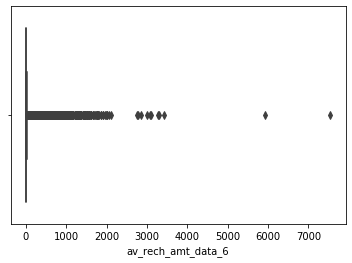

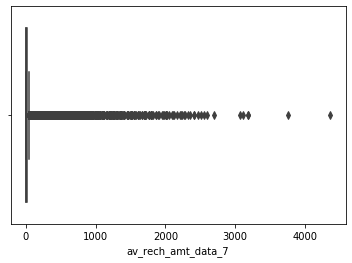

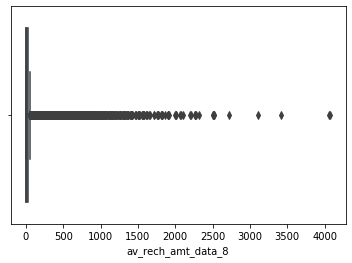

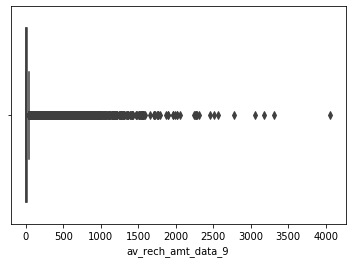

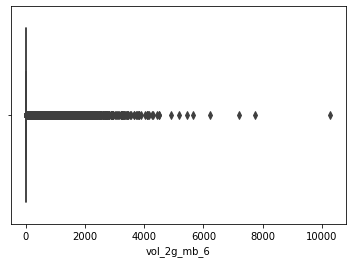

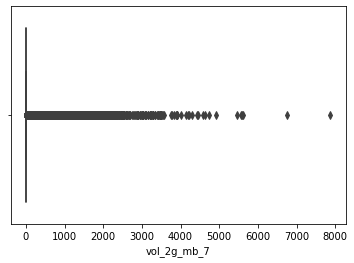

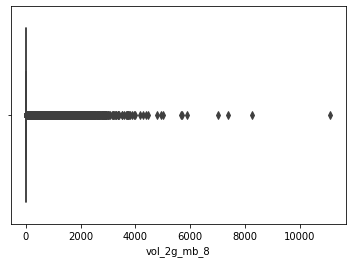

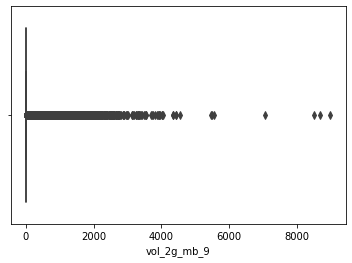

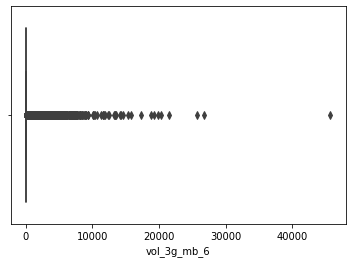

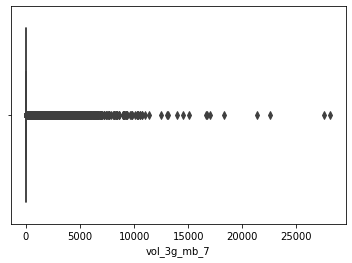

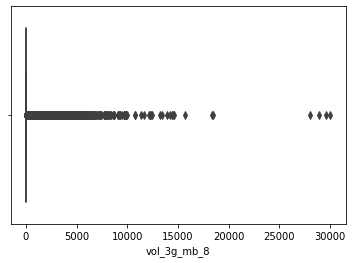

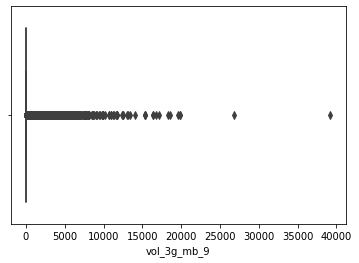

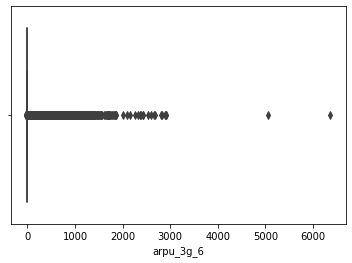

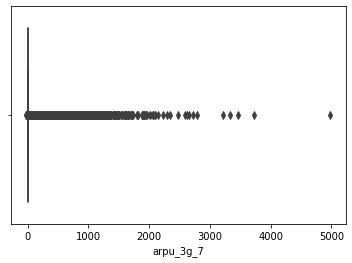

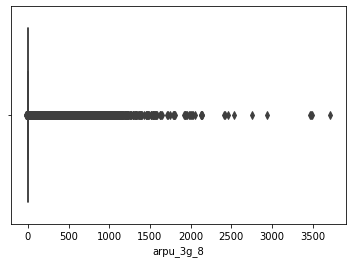

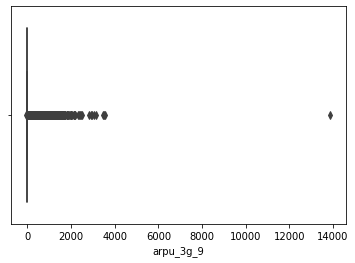

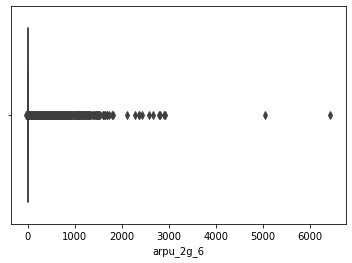

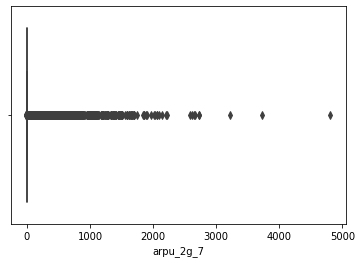

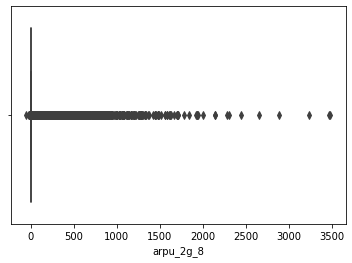

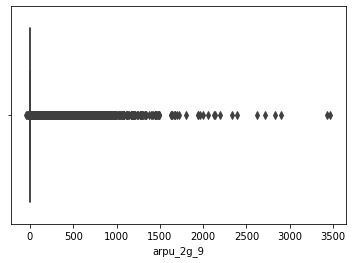

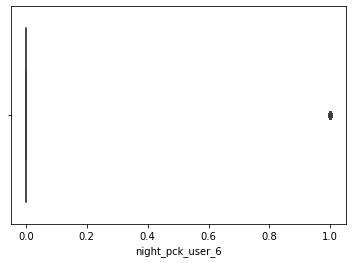

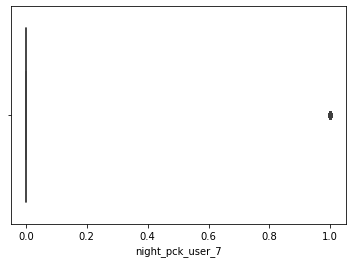

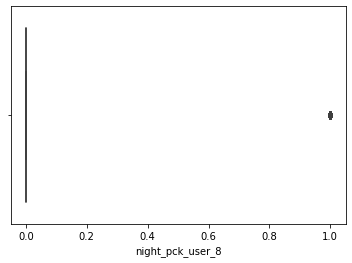

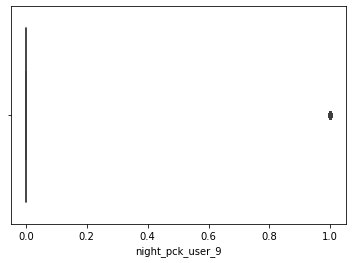

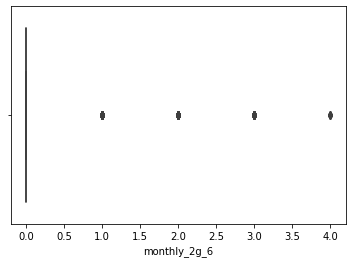

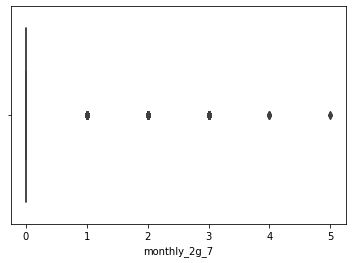

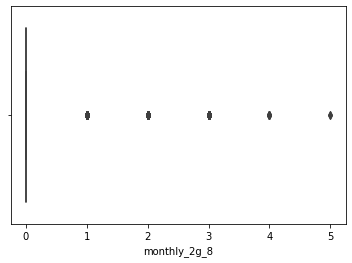

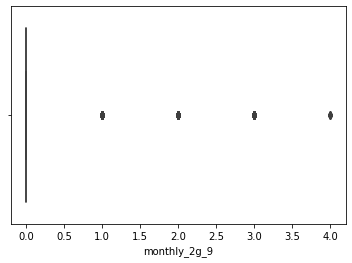

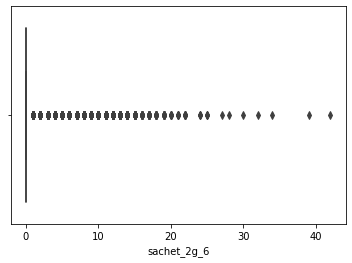

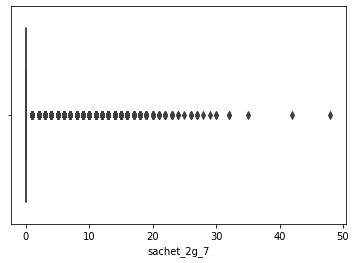

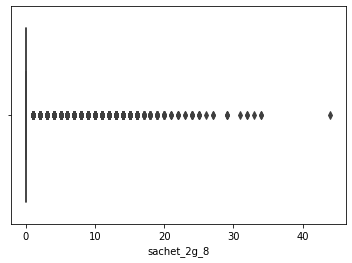

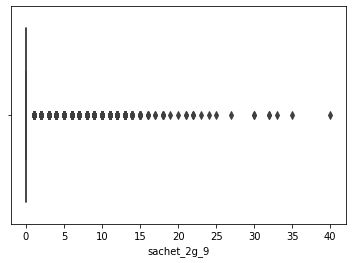

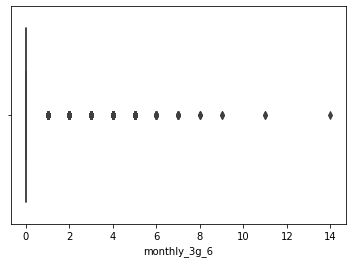

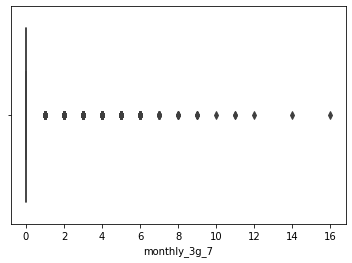

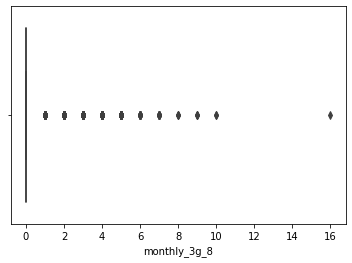

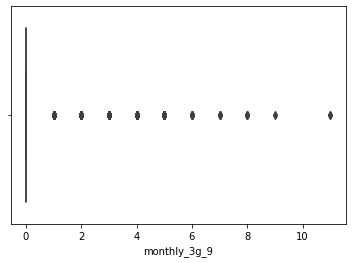

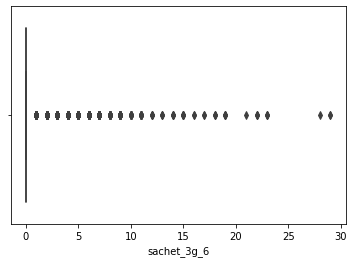

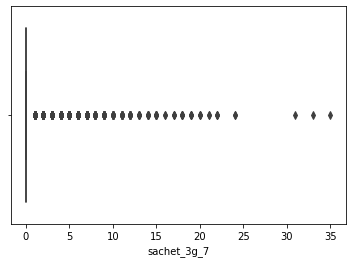

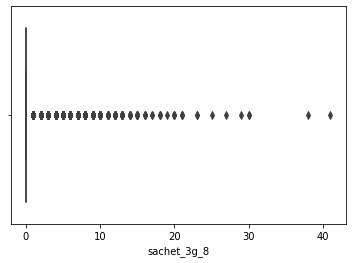

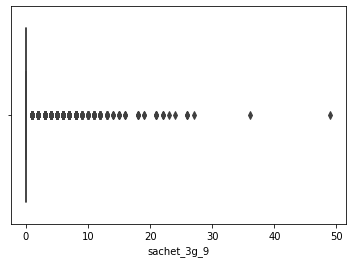

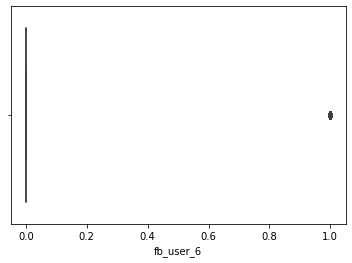

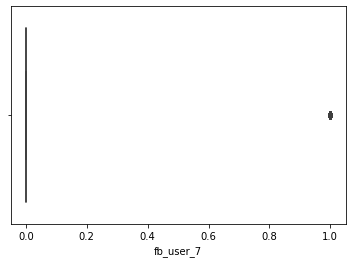

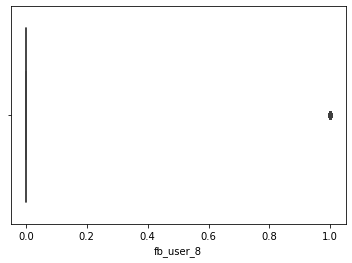

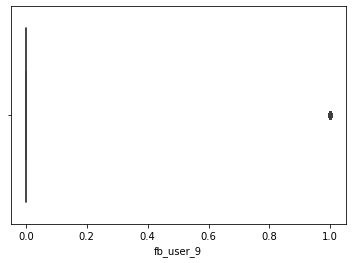

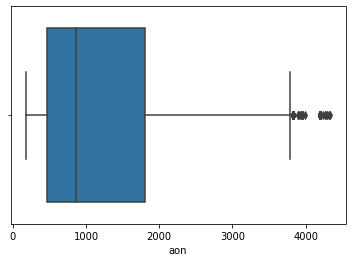

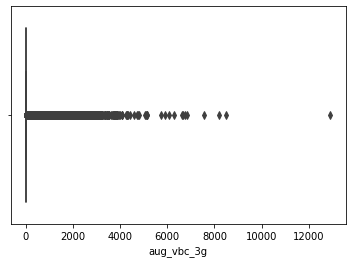

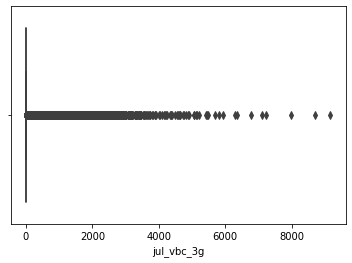

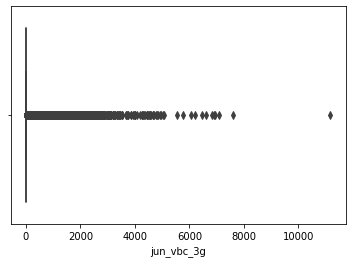

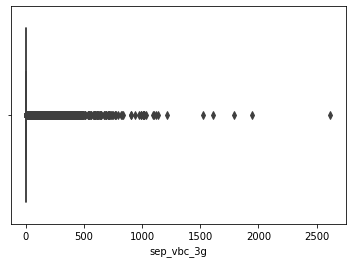

In [33]:
for col in (teleData_imputed.columns).tolist():
    sns.boxplot(col,data=teleData_imputed,)
    plt.show()

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_imputed.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     189.441086    186.002904    175.595457       9.558277       6.873981   
std      321.759659    321.325854    310.968398      71.403643      72.029965   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.650000     23.840000     16.030000       0.000000       0.000000   
50%       85.440000     83.130000     74.680000       0.000000       0.000000   
75%      217.830000    215.500000    202.830000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.246387         44.679599   
std        62.989180      56.176090        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.990000          1.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.000000         38.820000         37.890000   
max      

We will take care of all outliers during the data preparation after filtering out the high valued customers

## Feature Engineering - Deriving New Variables

##### Call and Data Usage Drop
There are 3 phases named as: `Good Phase`(6th and 7th month), `Action Phase`(8th month) & `Churn Phase`(9th month).

If we see a drop in call or data usage from `Good` to `Action` Phase, it can be a good indicator that the customer is not happy with the service and is about to churn.

So, we are deriving a new variable which will 1 when we see a drop in usage by more than 50% else 0.

In [35]:
# Creating the average CALL usage(both incomming and outgoing) for "Good Phase".
teleData_imputed['good_phase_call']=(teleData_imputed['total_ic_mou_6']+teleData_imputed['total_og_mou_6']+teleData_imputed['total_ic_mou_7']+teleData_imputed['total_og_mou_7'])/2

In [36]:
# Creating the average DATA usage(both 2G and 3G) for "Good Phase".
teleData_imputed['good_phase_data']=(teleData_imputed['vol_2g_mb_6']+teleData_imputed['vol_3g_mb_6']+teleData_imputed['vol_2g_mb_7']+teleData_imputed['vol_3g_mb_7'])/2

In [37]:
# Creating the CALL usage(both incomming and outgoing) for "Action Phase".
teleData_imputed['action_phase_call']=teleData_imputed['total_ic_mou_8']+teleData_imputed['total_og_mou_8']

In [38]:
# Creating the CALL usage(both 2G and 3G) for "Action Phase".
teleData_imputed['action_phase_data']=teleData_imputed['vol_2g_mb_8']+teleData_imputed['vol_3g_mb_8']

In [39]:
teleData_imputed['diff_call_bet_action_and_good_phase']=teleData_imputed['action_phase_call']-teleData_imputed['good_phase_call']

In [40]:
teleData_imputed['diff_data_bet_action_and_good_phase']=teleData_imputed['action_phase_data']-teleData_imputed['good_phase_data']

In [41]:
filter1=teleData_imputed['diff_call_bet_action_and_good_phase']<0
filter2=abs(teleData_imputed['diff_call_bet_action_and_good_phase'])>=(0.5*teleData_imputed['good_phase_call'])
teleData_imputed.loc[filter1 & filter2,"call_usage_drop"]=1
teleData_imputed['call_usage_drop']=teleData_imputed['call_usage_drop'].fillna(0)

In [42]:
teleData_imputed[['good_phase_call','action_phase_call','diff_call_bet_action_and_good_phase','call_usage_drop']].head()

good_phase_call  action_phase_call  diff_call_bet_action_and_good_phase  \
0            0.000               5.44                                5.440   
1          174.950             735.72                              560.770   
2          728.920             680.49                              -48.430   
3          427.615             405.34                              -22.275   
4          391.670             546.97                              155.300   

   call_usage_drop  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [43]:
filter1=teleData_imputed['diff_data_bet_action_and_good_phase']<0
filter2=abs(teleData_imputed['diff_data_bet_action_and_good_phase'])>=(0.5*teleData_imputed['good_phase_data'])
teleData_imputed.loc[filter1 & filter2,"data_usage_drop"]=1
teleData_imputed['data_usage_drop']=teleData_imputed['data_usage_drop'].fillna(0)

In [44]:
teleData_imputed[['good_phase_data','action_phase_data','diff_data_bet_action_and_good_phase','data_usage_drop']].head()

good_phase_data  action_phase_data  diff_data_bet_action_and_good_phase  \
0          132.890             115.36                              -17.530   
1           54.035             365.47                              311.435   
2            0.000               0.00                                0.000   
3            0.000               0.00                                0.000   
4            0.000               0.00                                0.000   

   data_usage_drop  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [45]:
# Dropping the intermediate columns
teleData_imputed.drop(['good_phase_call','good_phase_data','action_phase_call','action_phase_data','diff_call_bet_action_and_good_phase','diff_data_bet_action_and_good_phase'],axis=1,inplace=True)

##### High Roaming Users
Creating a new categorical variable `high_roam_user`, which has 1 for the customers who use more than 90 percentile of sum of roaming minutes_of_usage.

In [46]:
# Calculating the 90 percentile value for the sum of roaming minutes_of_usage.
x=teleData_imputed[['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8']].sum(axis=1).quantile(0.9)
x

110.66199999999998

In [47]:
# Number of High Roaming Users(who use more than 90 percentile of sum of roaming minutes_of_usage)
teleData_imputed['mobile_number'].where(teleData_imputed[['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8']].sum(axis=1)>x).dropna().shape

(10000,)

In [48]:
# Creating new column "high_roam_user".
teleData_imputed.loc[teleData_imputed[['roam_ic_mou_6','roam_og_mou_6','roam_ic_mou_7','roam_og_mou_7','roam_ic_mou_8','roam_og_mou_8']].sum(axis=1)>x,"high_roam_user"]=1
teleData_imputed['high_roam_user'].fillna(0,inplace=True)

## Selecting the `High Value Customers`

Finding the high values customers:
1. Creating a new columns that has average of the recharge of 6th and 7th month
2. Finding the 70th percentile and above.
3. Filtering the data to get the High Valued customers

In [49]:
teleData_imputed['avg_6_7']=(
    teleData_imputed["total_rech_amt_6"]+teleData_imputed["total_rech_amt_7"]
    +(teleData_imputed["av_rech_amt_data_6"]*teleData_imputed["total_rech_data_6"])
    +(teleData_imputed["av_rech_amt_data_7"]*teleData_imputed["total_rech_data_7"]))/2

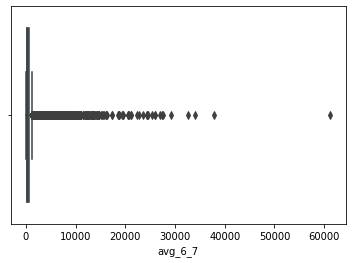

In [50]:
sns.boxplot(teleData_imputed['avg_6_7'])

In [51]:
percentile70th= teleData_imputed['avg_6_7'].quantile(0.70)
print("The 70th percentile average revenue is "+ str(percentile70th))

The 70th percentile average revenue is 478.0


In [52]:
teleData_HighValuesCustomers= teleData_imputed[teleData_imputed['avg_6_7']>percentile70th]
teleData_HighValuesCustomers.shape

(29953, 218)

Taking a look into the High Valued customers dataset:

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers.head(10))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803    21.100         0.00         0.00   
7   1069.180  1349.850  3171.480   500.000        57.84        54.68   
8    378.721   492.223   137.362   166.787       413.69       351.03   
21   514.453   597.753   637.760   578.596       102.41       132.11   
23    74.350   193.897   366.966   811.480        48.96        50.66   
33   977.020  2362.833   409.230   799.356         0.00         0.00   
38   363.987   486.558   393.909   391.709       248.99       619.96   
41   482.832   425.764   229.769   143.596        86.39       118.88   
48  1873.271   575.927   179.218  1189.744      2061.69       881.43   
53   978.077  1141.296   706.020  1076.247       135.14       119.59   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   
33         0.00         0.00          0.00          0.00          0.00   
38       666.38       494.79         88.86         50.58         97.81   
41        80.44        40.06        232.36        280.78        136.69   
48       156.91      1589.23       1087.76        258.29         68.18   
53       102.69        99.83        479.31        543.18        261.34   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   
33          0.00           0.00           0.00           0.00            0.0   
38        213.24           0.00           0.00           0.00            0.0   
41         49.06           0.00           0.00           0.00            0.0   
48        728.41           0.00           0.00           0.00            0.0   
53        403.23           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   
33           0.00           0.00           0.00            0.0   
38           0.00           0.00           0.00            0.0   
41           0.00           0.00           0.00            0.0   
48           0.00           0.00        

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData_HighValuesCustomers.info(verbose=True,null_counts =True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 218 columns):
mobile_number         29953 non-null int64
circle_id             29953 non-null int64
loc_og_t2o_mou        29953 non-null float64
std_og_t2o_mou        29953 non-null float64
loc_ic_t2o_mou        29953 non-null float64
arpu_6                29953 non-null float64
arpu_7                29953 non-null float64
arpu_8                29953 non-null float64
arpu_9                29953 non-null float64
onnet_mou_6           29953 non-null float64
onnet_mou_7           29953 non-null float64
onnet_mou_8           29953 non-null float64
onnet_mou_9           29953 non-null float64
offnet_mou_6          29953 non-null float64
offnet_mou_7          29953 non-null float64
offnet_mou_8          29953 non-null float64
offnet_mou_9          29953 non-null float64
roam_ic_mou_6         29953 non-null float64
roam_ic_mou_7         29953 non-null float64
roam_ic_mou_8         29953 non-null fl

## Tagging the `Churners`

The next step is to tag the numbers as churned(1) and not churned(0)based on the following conditions:

total_ic_mou_9 == 0

total_og_mou_9 == 0

vol_2g_mb_9 == 0

vol_3g_mb_9 == 0

In [55]:
filter=((teleData_HighValuesCustomers['total_ic_mou_9']==0)&(teleData_HighValuesCustomers['vol_2g_mb_9']==0)&(teleData_HighValuesCustomers['vol_3g_mb_9']==0)&(teleData_HighValuesCustomers['total_og_mou_9']==0))
teleData_HighValuesCustomers['churned_tag']=np.where(filter, 1, 0)

In [56]:
teleData_HighValuesCustomers['churned_tag'].value_counts()

0    27520
1     2433
Name: churned_tag, dtype: int64

#### Observations:

Here we can see that there are only 2433 Churned customers(~8% of High Value Customers) and 27520 Non-Churned Customers(~92% of High Value Customer data).

This is a highly imbalanced dataset.

### Dropping the columns related to 9th month.

We can delete all the columns that are related to the churn phase i.e. the '_9' columns

Removing all columns that have '_9' in them.

In [57]:
colsToDrop=[x for x in teleData_HighValuesCustomers.columns if '_9' in x]
print("No. of columns with _9 = ",len(colsToDrop))

No. of columns with _9 =  51


In [58]:
teleData_HighValuesCustomers_Tagged=teleData_HighValuesCustomers.drop(colsToDrop,axis=1)

In [59]:
teleData_HighValuesCustomers_Tagged.shape

(29953, 168)

Now we have removed all the columns that are related to the churn phase.
Lets have a look at the dataset now.

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Tagged.head(5))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23          

### Checking & Removing all the columns with only 1 unique values

In [61]:
singleValuedColumnsDict={}
for col in list(teleData_HighValuesCustomers_Tagged.columns):
    if(teleData_HighValuesCustomers_Tagged[col].nunique()==1 ):
        singleValuedColumnsDict[col]=teleData_HighValuesCustomers_Tagged[col].unique().tolist()[0]
print(singleValuedColumnsDict)

{'circle_id': 109, 'loc_og_t2o_mou': 0.0, 'std_og_t2o_mou': 0.0, 'loc_ic_t2o_mou': 0.0, 'std_og_t2c_mou_6': 0.0, 'std_og_t2c_mou_7': 0.0, 'std_og_t2c_mou_8': 0.0, 'std_ic_t2o_mou_6': 0.0, 'std_ic_t2o_mou_7': 0.0, 'std_ic_t2o_mou_8': 0.0}


As we can see that apart from `circle_id`, all the other columns with only 1 unique value have `0`. 

Also as with no variance, it will not contribute to further analysis. So, we can drop them.

In [62]:
teleData_HighValuesCustomers_Final= teleData_HighValuesCustomers_Tagged.drop(list(singleValuedColumnsDict.keys()),axis=1)
teleData_HighValuesCustomers_Final.shape

(29953, 158)

Thus here we have taken care of single valued columns, and imputed the missing values. The only thing that remains is outlier treatment. We will also need to remove the mobile number columns or we can make it the index. For the time being we will just drop it.

In [63]:
teleData_HighValuesCustomers_Final=teleData_HighValuesCustomers_Final.drop('mobile_number',axis=1)

In [64]:
teleData_HighValuesCustomers_Final.shape

(29953, 157)

## Outlier Treatment

In [65]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Final.describe([.10,.25,.35,.50,.75,.85,.95,.99]))

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    260.900880    268.051744   
std      460.868223    480.028497    502.136278    459.853278    480.303238   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
10%      171.795000    177.973000     84.302800      0.710000      0.580000   
25%      310.142000    310.071000    231.615000     17.090000     16.040000   
35%      384.107800    384.282400    312.264800     36.632000     35.430000   
50%      482.354000    481.496000    427.604000     84.640000     82.830000   
75%      700.240000    698.829000    661.753000    290.490000    290.540000   
85%      861.286400    860.452400    833.577800    530.882000    549.990000   
95%     1241.649400   1261.885600   1255.086400   1135.808000   1187.712000   
99%     1985.394360   1999.521120   1986.739600   2153.717600   2202.857600   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000   29953.000000   
mean     234.345252    373.800402    378.233106    335.123008      16.124001   
std      458.751242    482.712621    499.138982    481.985106      76.344227   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.000000     11.280000     10.490000      2.200000       0.000000   
25%       10.440000     71.610000     69.980000     46.760000       0.000000   
35%       25.864000    124.816000    120.794000     91.640000       0.000000   
50%       65.660000    222.560000    220.040000    182.840000       0.000000   
75%      240.630000    487.910000    494.030000    438.860000       0.000000   
85%      452.902000    710.046000    725.236000    647.098000       8.014000   
95%     1075.384000   1256.662000   1272.430000   1167.620000      84.628000   
99%     2159.676400   2330.358400   2411.139600   2191.731200     343.563200   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.646145      12.512269      26.596033      20.155134   
std        75.833558      74.179181     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
35%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
85%         2.160000       3.030000      15.830000       5.002000   
95%        55.640000      56.362000     145.562000     104.316000   
99%       281.194400     282.689200     531.348400     437.784000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         84.574122         85.762835         78.153334   
std       104.799622        228.962993        240.702116        227.540167   
min         0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.630000          2.540000   
35%         0.000000         10.230000         10.590000          7.814000   
50%         0.000000         24.360000         24.680000         20.740000   
75%         0.000000         78.060000         78.510000         72.130000   
85%         5.142000        133.898000

In [66]:
q1=teleData_HighValuesCustomers_Final.quantile(0.25)
q3=teleData_HighValuesCustomers_Final.quantile(0.99)
IQR=q3-q1
# print(IQR)

In [67]:
teleData_HighValuesCustomers_Final_naOutliers = teleData_HighValuesCustomers_Final[~((teleData_HighValuesCustomers_Final < (q1 - 1.5*IQR)) |(teleData_HighValuesCustomers_Final > (q3 + 1.5*IQR))).any(axis=1)]
teleData_HighValuesCustomers_Final_naOutliers.shape

(27432, 157)

# PCA

Feature Standardization:

Standardizing the values of all continous variables:
For that lets see which are all the contnous variables.

In [68]:
for col in list(teleData_HighValuesCustomers_Final_naOutliers.columns):
    if(teleData_HighValuesCustomers_Final_naOutliers[col].nunique()>50 ): continue
    else:
        print(col+":"+str(teleData_HighValuesCustomers_Final_naOutliers[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

og_others_7:[0.0]
----------------------------------------------------------------------------------
og_others_8:[0.0]
----------------------------------------------------------------------------------
total_rech_data_6:[1.0, 0.0, 2.0, 4.0, 6.0, 3.0, 8.0, 7.0, 12.0, 5.0, 16.0, 11.0, 14.0, 20.0, 10.0, 9.0, 18.0, 15.0, 22.0, 17.0, 21.0, 13.0, 19.0, 25.0, 24.0, 26.0, 28.0, 23.0]
----------------------------------------------------------------------------------
total_rech_data_7:[1.0, 0.0, 2.0, 12.0, 7.0, 4.0, 5.0, 6.0, 3.0, 8.0, 10.0, 16.0, 11.0, 9.0, 13.0, 29.0, 15.0, 14.0, 23.0, 17.0, 22.0, 20.0, 19.0, 21.0, 25.0, 18.0, 26.0, 24.0, 27.0]
----------------------------------------------------------------------------------
total_rech_data_8:[1.0, 0.0, 3.0, 2.0, 16.0, 7.0, 4.0, 6.0, 5.0, 13.0, 17.0, 15.0, 24.0, 14.0, 12.0, 9.0, 10.0, 8.0, 11.0, 18.0, 28.0, 23.0, 22.0, 26.0, 19.0, 25.0, 29.0, 27.0, 20.0, 21.0]
----------------------------------------------------------------------------------


From this we can say that those with either one or 2 unique values are not continous, and those with more uniques are. we will standardize all those columns.

In [69]:
columns_to_standardize=[]
for col in list(teleData_HighValuesCustomers_Final_naOutliers.columns):
    if(teleData_HighValuesCustomers_Final_naOutliers[col].nunique()>2 ): 
        columns_to_standardize.append(col)
print(columns_to_standardize)        

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_m

In [70]:
teleData_HighValuesCustomers_Final_normalized=teleData_HighValuesCustomers_Final_naOutliers
#for col in list(teleData_HighValuesCustomers_Final_naOutliers.columns):
teleData_HighValuesCustomers_Final_normalized[columns_to_standardize]=(teleData_HighValuesCustomers_Final_normalized[columns_to_standardize]-teleData_HighValuesCustomers_Final_normalized[columns_to_standardize].mean())/teleData_HighValuesCustomers_Final_normalized[columns_to_standardize].std()
teleData_HighValuesCustomers_Final_normalized.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -0.974371 -0.929096 -0.724942    -0.600089    -0.598493    -0.549245   
7   1.590599  2.439929  7.506813    -0.461240    -0.469998    -0.419396   
8  -0.440850 -0.105692 -0.937692     0.393002     0.226408    -0.462133   
21 -0.041503  0.207543  0.455007    -0.354247    -0.288042    -0.337821   
23 -1.336361 -0.991188 -0.298662    -0.482557    -0.479445    -0.465858   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...       aon  \
0      -0.799400     -0.789148     -0.740460      -0.245267  ... -0.252488   
7       0.207133      0.443358      0.016870       0.061538  ... -0.425922   
8      -0.589272     -0.613930     -0.423316      -0.245267  ... -0.934730   
21      0.883068      1.159444      1.544683      -0.245267  ... -0.511594   
23     -0.609805     -0.594958     -0.262025      -0.245267  ... -0.632788   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  call_usage_drop  \
0    -0.342514   -0.424133   -0.130169   -0.076670              0.0   
7    -0.270799   -0.375745   -0.350824   -0.186835              0.0   
8    -0.367093    1.849608   -0.074082   -0.186835              1.0   
21   -0.422257   -0.424133   -0.400971   -0.186835              0.0   
23   -0.316152   -0.294647   -0.400971   -0.186835              0.0   

    data_usage_drop  high_roam_user   avg_6_7  churned_tag  
0               0.0             0.0 -0.565935            1  
7               0.0             1.0  0.131856            1  
8               1.0             0.0 -0.413224            0  
21              0.0             0.0 -0.475646            0  
23              0.0             0.0 -0.539183            0  

[5 rows x 157 columns]

In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Final_normalized.describe([.10,.25,.35,.50,.75,.85,.95,.99]))

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  2.743200e+04  2.743200e+04  2.743200e+04  2.743200e+04  2.743200e+04   
mean  -5.165402e-15  5.283175e-15 -1.005513e-14 -1.600785e-14 -1.283278e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.940214e+00 -4.229308e+00 -2.280552e+00 -6.000892e-01 -5.984934e-01   
10%   -1.060057e+00 -1.052507e+00 -1.096947e+00 -5.987689e-01 -5.974359e-01   
25%   -6.629541e-01 -6.721316e-01 -6.997797e-01 -5.604198e-01 -5.627037e-01   
35%   -4.497032e-01 -4.514500e-01 -4.795061e-01 -5.148967e-01 -5.181123e-01   
50%   -1.661377e-01 -1.695906e-01 -1.621134e-01 -4.004820e-01 -4.086530e-01   
75%    4.363475e-01  4.360780e-01  4.526124e-01  8.608921e-02  7.276860e-02   
85%    8.638129e-01  8.704673e-01  8.825852e-01  6.566011e-01  6.714102e-01   
95%    1.836961e+00  1.857076e+00  1.897621e+00  2.054402e+00  2.071455e+00   
99%    3.433625e+00  3.366770e+00  3.441718e+00  4.187561e+00  4.107112e+00   
max    1.167783e+01  1.123081e+01  8.643988e+00  1.143202e+01  1.051825e+01   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  2.743200e+04  2.743200e+04  2.743200e+04  2.743200e+04   2.743200e+04   
mean  -5.972807e-15 -2.842115e-14 -3.176498e-14 -2.263664e-14  -6.368282e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
min   -5.492451e-01 -7.994001e-01 -7.891484e-01 -7.404600e-01  -2.452665e-01   
10%   -5.492451e-01 -7.768001e-01 -7.687624e-01 -7.363237e-01  -2.452665e-01   
25%   -5.250210e-01 -6.489407e-01 -6.440818e-01 -6.400512e-01  -2.452665e-01   
35%   -4.873129e-01 -5.321593e-01 -5.375262e-01 -5.392009e-01  -2.452665e-01   
50%   -3.906027e-01 -3.204518e-01 -3.266000e-01 -3.333524e-01  -2.452665e-01   
75%    3.306444e-02  2.567624e-01  2.570999e-01  2.482797e-01  -2.452665e-01   
85%    5.397653e-01  7.317528e-01  7.499905e-01  7.051781e-01  -1.085939e-01   
95%    2.008549e+00  1.902839e+00  1.887942e+00  1.875986e+00   1.150950e+00   
99%    4.303529e+00  4.026566e+00  4.036378e+00  3.990289e+00   5.012686e+00   
max    1.134547e+01  1.047953e+01  1.049984e+01  1.130606e+01   1.560215e+01   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   2.743200e+04   2.743200e+04   2.743200e+04   2.743200e+04   
mean    7.671009e-16   1.302070e-15  -1.789583e-15  -8.073016e-16   
std     1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
min    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
10%    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
25%    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
35%    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
50%    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
75%    -2.134024e-01  -2.188432e-01  -2.579776e-01  -2.326052e-01   
85%    -1.762134e-01  -1.633483e-01  -9.356007e-02  -1.810125e-01   
95%     8.936177e-01   9.020827e-01   1.279941e+00   1.111131e+00   
99%     4.758327e+00   4.889434e+00   5.084578e+00   4.902421e+00   
max     1.581741e+01   1.626360e+01   1.477813e+01   1.558689e+01   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   2.743200e+04      2.743200e+04      2.743200e+04      2.743200e+04   
mean   -1.547440e-17      1.487460e-14      1.354583e-14      8.311672e-15   
std     1.000000e+00      1.000000e+00      1.000000e+00      1.000000e+00   
min    -2.339930e-01     -4.481510e-01     -4.525308e-01     -4.500495e-01   
10%    -2.339930e-01     -4.481510e-01     -4.525308e-01     -4.500495e-01   
25%    -2.339930e-01     -4.229505e-01     -4.257517e-01     -4.344644e-01   
35%    -2.339930e-01     -3.891735e-01     -3.905317e-01     -4.009564e-01   
50%    -2.339930e-01     -3.086961e-01     -3.090649e-01     -3.195242e-01   
75%    -2.339930e-01      2.311865e-04     -4.959419e-04      5.458107e-03   
85%    -1.752346e-01      3.156025e-01

In [72]:
churn = (sum(teleData_HighValuesCustomers_Final_normalized['churned_tag'])/len(teleData_HighValuesCustomers_Final_normalized['churned_tag'].index))*100
churn

8.089093030037912

Obtaining Test Train Spilt:

In [73]:
final_dataset=teleData_HighValuesCustomers_Final_normalized

In [74]:
X = final_dataset.drop(['churned_tag'],axis=1)
Y = final_dataset['churned_tag']
display(X.head())
display(Y.head())

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -0.974371 -0.929096 -0.724942    -0.600089    -0.598493    -0.549245   
7   1.590599  2.439929  7.506813    -0.461240    -0.469998    -0.419396   
8  -0.440850 -0.105692 -0.937692     0.393002     0.226408    -0.462133   
21 -0.041503  0.207543  0.455007    -0.354247    -0.288042    -0.337821   
23 -1.336361 -0.991188 -0.298662    -0.482557    -0.479445    -0.465858   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_8  \
0      -0.799400     -0.789148     -0.740460      -0.245267  ...        1.0   
7       0.207133      0.443358      0.016870       0.061538  ...        0.0   
8      -0.589272     -0.613930     -0.423316      -0.245267  ...        1.0   
21      0.883068      1.159444      1.544683      -0.245267  ...        0.0   
23     -0.609805     -0.594958     -0.262025      -0.245267  ...        1.0   

         aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  call_usage_drop  \
0  -0.252488   -0.342514   -0.424133   -0.130169   -0.076670              0.0   
7  -0.425922   -0.270799   -0.375745   -0.350824   -0.186835              0.0   
8  -0.934730   -0.367093    1.849608   -0.074082   -0.186835              1.0   
21 -0.511594   -0.422257   -0.424133   -0.400971   -0.186835              0.0   
23 -0.632788   -0.316152   -0.294647   -0.400971   -0.186835              0.0   

    data_usage_drop  high_roam_user   avg_6_7  
0               0.0             0.0 -0.565935  
7               0.0             1.0  0.131856  
8               1.0             0.0 -0.413224  
21              0.0             0.0 -0.475646  
23              0.0             0.0 -0.539183  

[5 rows x 156 columns]

0     1
7     1
8     0
21    0
23    0
Name: churned_tag, dtype: int32

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [76]:
print(str(Y_train.sum())+'-'+str(Y_train.count()))
print(str(Y_test.sum())+"-"+str(Y_test.count()))

1565-19202
654-8230


In [77]:
pca_churn = PCA(0.95)

In [78]:
df_train_pca = pca_churn.fit_transform(X_train)
df_train_pca.shape

(19202, 72)

In [79]:
logistic_model = LogisticRegression()
pca_model = logistic_model.fit(df_train_pca,Y_train)

In [80]:
df_test_pca = pca_churn.transform(X_test)
df_test_pca.shape

(8230, 72)

In [81]:
#Making prediction on the test data
pred_probs_test = pca_model.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(Y_test, pred_probs_test))

'0.90'

In [99]:
# Use score method to get accuracy of model
score = pca_model.score(df_test_pca, Y_test)
print("ACCURACY: "+str("{:2.2f}".format(score)))

ACCURACY: 0.93


In [112]:
print(str(Y_test))
print(str(pred_probs_test))

20214    0
84337    0
78285    1
15486    0
42332    0
54500    0
31677    0
6680     0
81941    0
77285    0
86144    0
10155    0
5425     0
94240    0
26399    0
3556     0
28262    0
76579    0
47204    0
82791    0
73483    0
32042    0
54924    0
2119     0
57580    1
8930     0
36794    0
21937    0
68200    0
48720    0
        ..
33147    0
60286    0
12285    0
31602    0
73499    0
47464    0
69170    0
44060    0
4224     0
8100     0
17411    0
76023    0
37417    0
30363    0
30880    0
37992    0
15823    0
98974    0
48746    1
42169    0
67671    0
43279    0
8217     0
80638    0
83937    0
95331    0
42954    0
38388    1
70989    0
3418     0
Name: churned_tag, Length: 8230, dtype: int32
[0.08283867 0.12110812 0.31316819 ... 0.14022462 0.0719579  0.13362264]


In [103]:
#tn, fp, fn, tp=confusion_matrix(Y_test, pred_probs_test).ravel()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

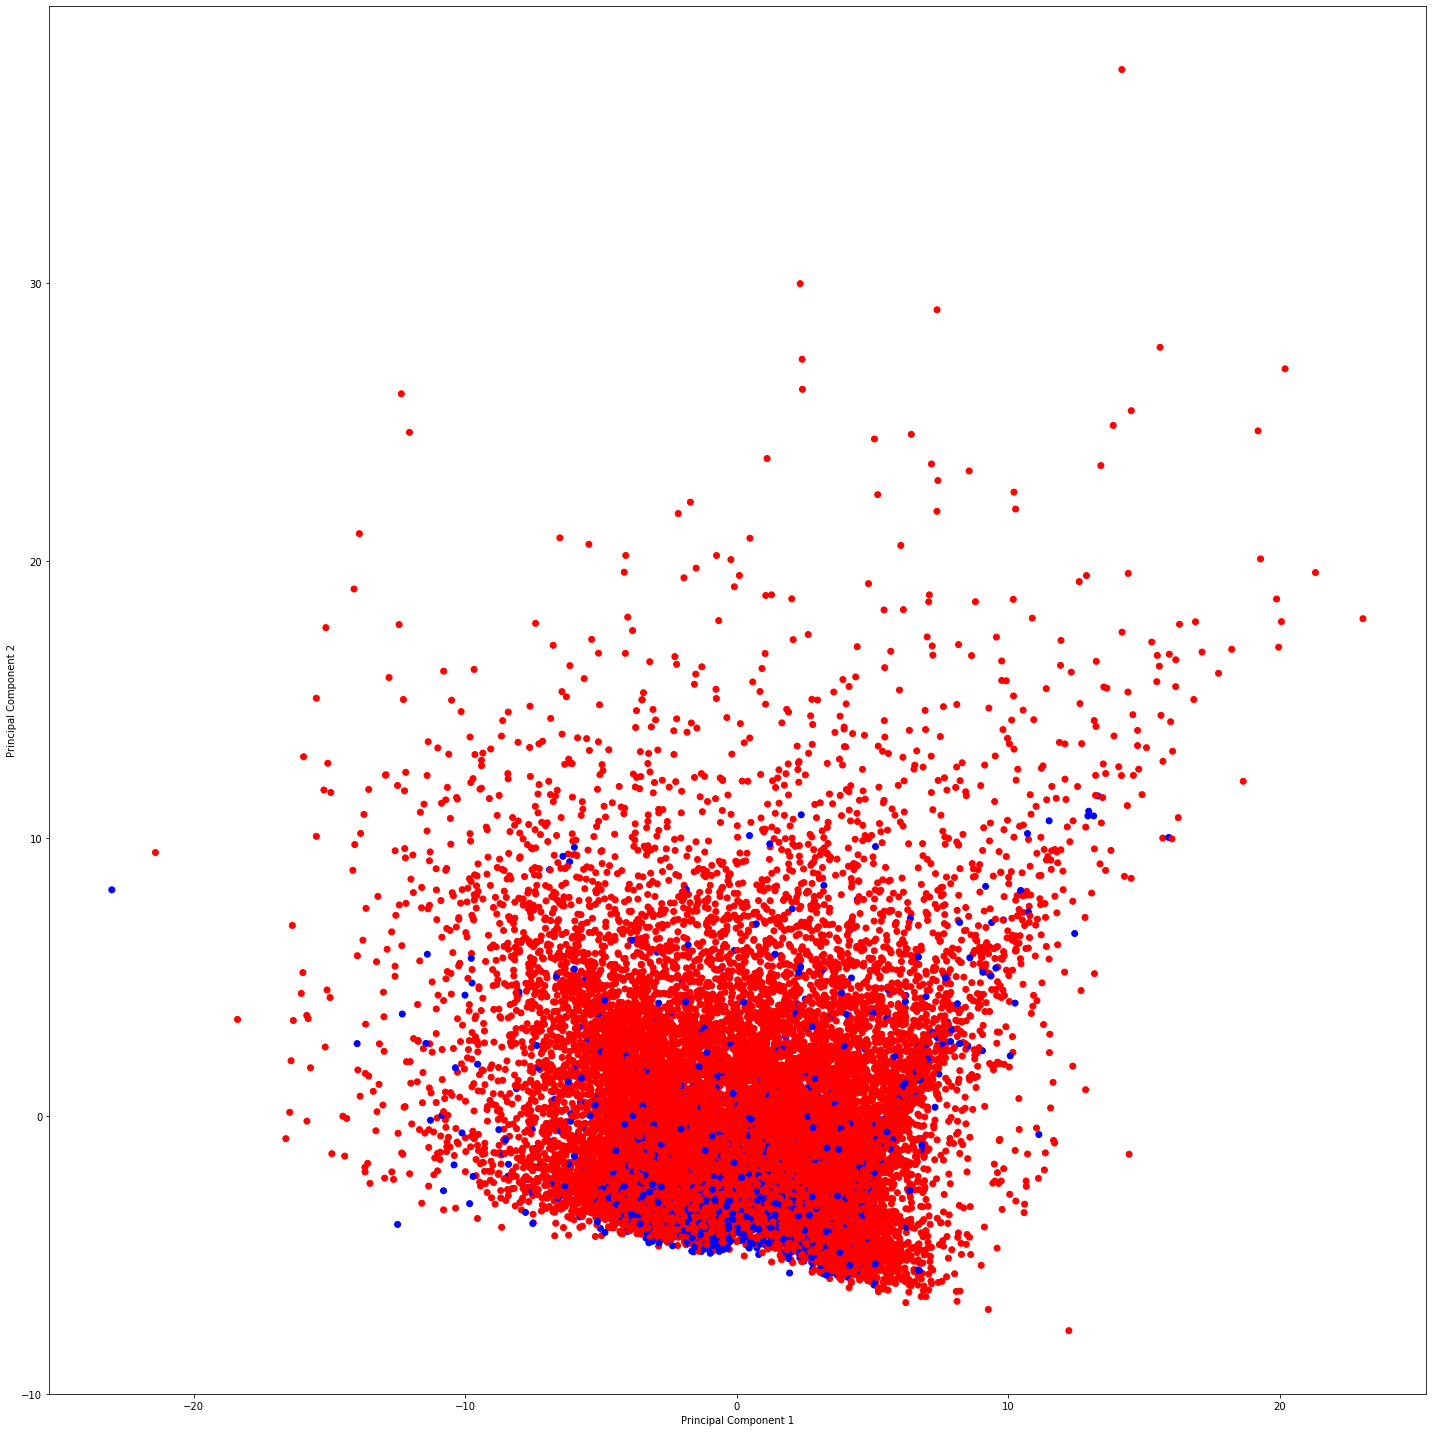

In [95]:
fig = plt.figure(figsize = (20,20))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = Y_train.map({1:'blue',0:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

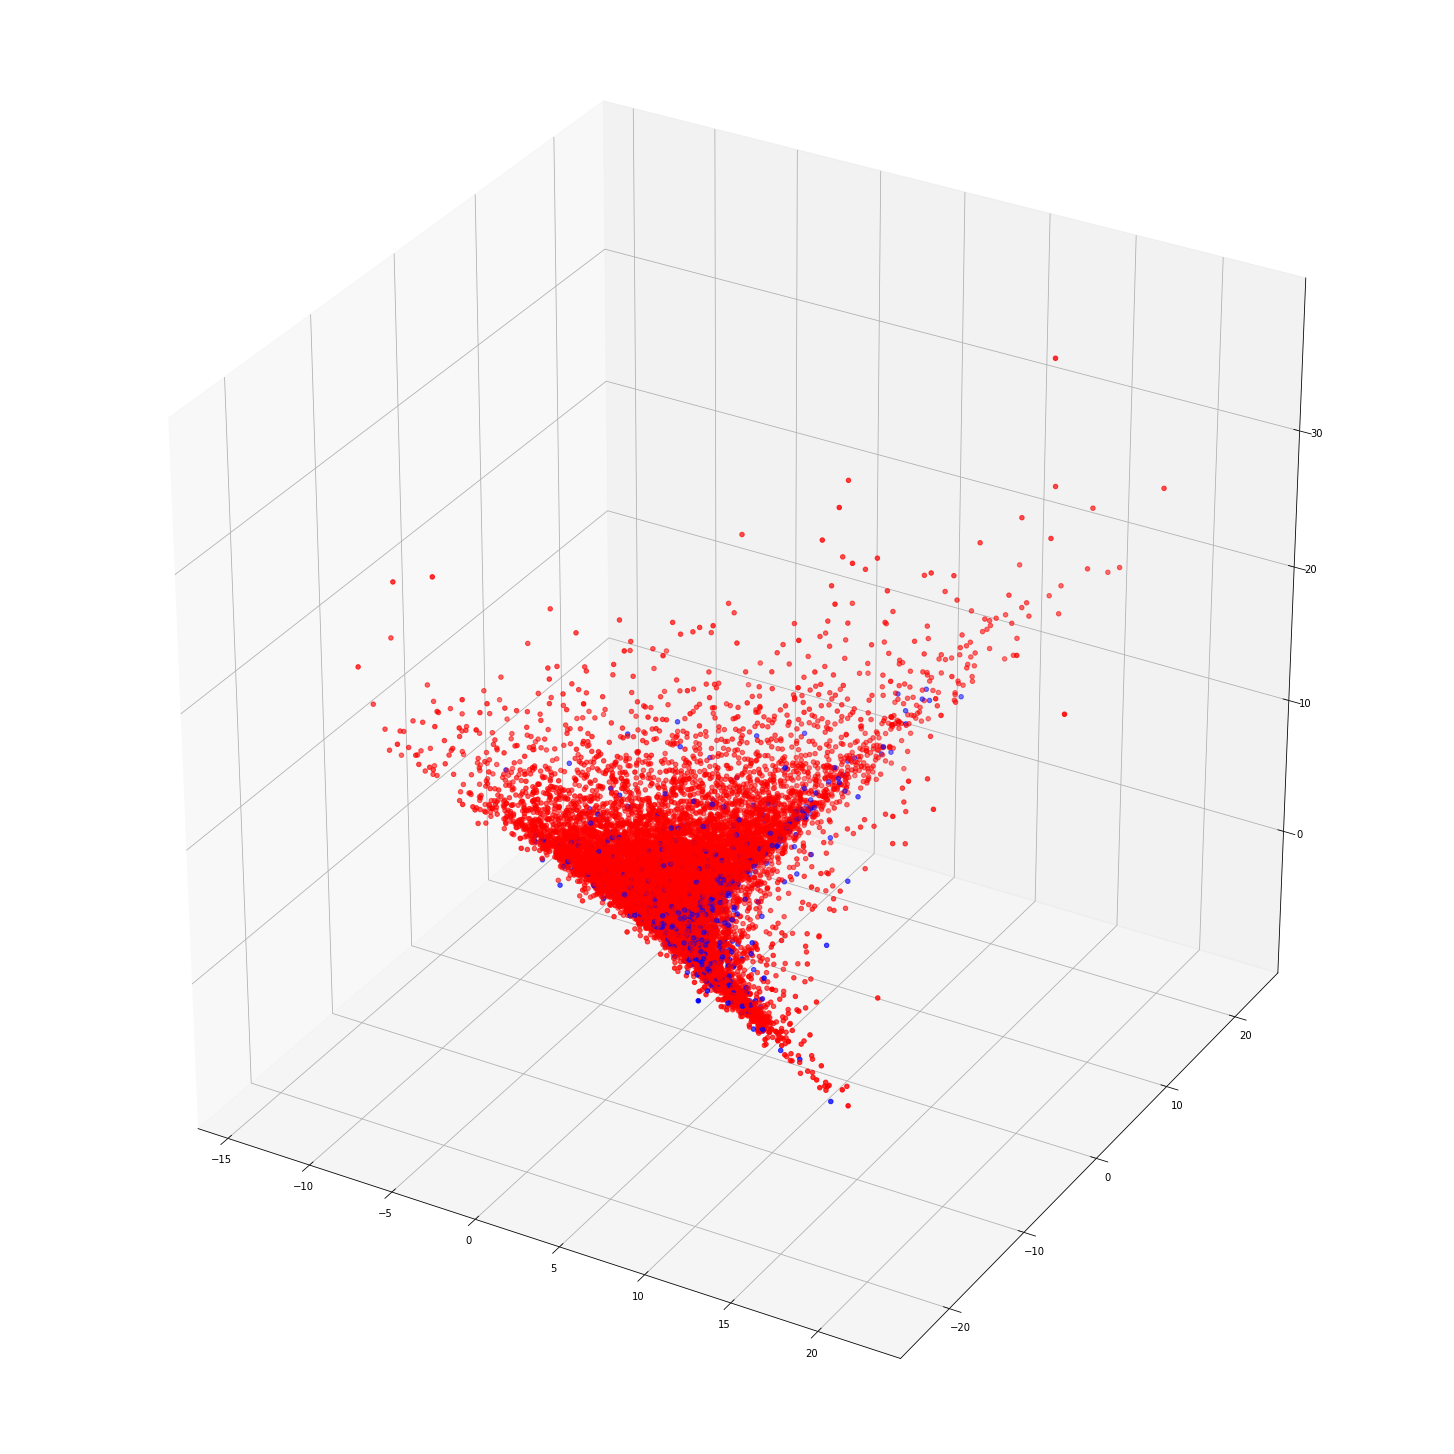

In [94]:

fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=Y_train.map({1:'blue',0:'red'}))